# Applied Machine Learning 2021- Assignment 2

## Belief in Supernatural Evil and Guns
In this assignment we will replicate a study of belief in supernatural evil and attitudes towards guns in the United States. The study is:

Christopher G. Ellison, Benjamin Dowd-Arrow, Amy M. Burdette, Pablo E. Gonzalez, Margaret S. Kelley, Paul Froese,
"Peace through superior firepower: Belief in supernatural evil and attitudes toward gun policy in the United States", Social Science Research, Volume 99, 2021, https://doi.org/10.1016/j.ssresearch.2021.102595.

---

> Student Name: Aikaterini Dimatou </br>
> AM: 8180199
> University: Athens University of Economics and Business <br />
> Email: t8180199@aueb.gr



In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import numpy as np
import scipy.stats.stats as stats
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
data = pd.read_excel("BRS_data.XLSX")
data

,MOTHERLODE_ID,PROJECT_ID,RESPONDENT_ID,METHOD_ID,METHOD_TYPE,PROJECT_NUMBER,CREATED_ON,PRACTICE,RESPONDENT_DATE,RESPONDENT_LANGUAGE,...,STATE,PROJWT,WEIGHT,Q2,RELTRAD,I_GENDER,I_EDUC,I_MARITAL,I_RELIGION,I_ATTEND
0,128170892,33370,01_000001_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,20086.696606,0.270000,Church of Christ,1.0,2.0,5.0,3.0,1.0,6.0
1,128170893,33370,01_000002_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,26218.573175,0.352423,Church of God In Christ,3.0,2.0,3.0,3.0,3.0,2.0
2,128170894,33370,01_000003_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,ND,41408.889891,0.556608,ELCA,2.0,2.0,3.0,1.0,2.0,6.0
3,128170895,33370,01_000004_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,TX,50023.027356,0.672397,Independent Methodist,2.0,2.0,4.0,3.0,2.0,5.0
4,128170896,33370,01_000005_00000001,162048140_01,SCAN,162048140,3/26/2014,OTHER,1/24/2014,en-US,...,IA,230734.428388,3.101474,Don't have specific name,1.0,1.0,2.0,2.0,1.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,128172920,33371,02_000301_00000013,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/10/2014,es-AR,...,CA,17054.912661,0.229248,NaN,4.0,2.0,5.0,2.0,4.0,2.0
1568,128172921,33371,02_000326_00000014,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/12/2014,es-AR,...,CA,104454.336796,1.404049,NaN,4.0,2.0,2.0,2.0,4.0,1.0
1569,128172922,33371,02_000351_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CA,153453.642034,2.062685,NaN,6.0,2.0,3.0,1.0,5.0,6.0
1570,128172335,33371,02_000352_00000015,162048140_02,SCAN,162048140,3/26/2014,OTHER,3/19/2014,es-AR,...,CT,33324.200008,0.447935,Catolica Romana - Latinos,4.0,1.0,5.0,2.0,4.0,3.0


First we have explore our data and specify whether there are any NaN values because they will constitute a problem in our analysis

## Q1: Belief in Supernatural Evil Metric

Reading the Codebook we understand that the answers to the questions that we need are the following:
* In your opinion, does each of the following exist? The Devil/Satan **Q23A**
* In your opinion, does each of the following exist? Hell **Q23C**
* In your opinion, does each of the following exist? Demons **Q23G**


* The method that we are going to use to represent these three columns into one dimension is PCA
* PCA is an unsupervised method that only needs us to specify the number of new dimensions that we want 


In [3]:
q1_data = data[['Q23A', 'Q23C', 'Q23G']].copy()
q1_data.rename(columns={"Q23A": "Devil", "Q23C": "Hell", "Q23G": "Demons"}, inplace= True)
q1_data

,Devil,Hell,Demons
0,4.0,4.0,4.0
1,4.0,4.0,4.0
2,3.0,2.0,2.0
3,4.0,4.0,4.0
4,4.0,4.0,4.0
...,...,...,...
1567,4.0,2.0,4.0
1568,3.0,3.0,3.0
1569,4.0,4.0,3.0
1570,3.0,3.0,3.0


In [4]:
data['Q23A'].isna().values.sum()


68

In [5]:
data['Q23C'].isna().values.sum()

73

In [6]:
data['Q23G'].isna().values.sum()

80

We want to get rid of rows that contain NaN values

* As we can see there are several NaN values that we have to deal with 
* We will use the method mentioned in the study, called Multiple Imputation
* The scikit-learn machine learning library provides the [IterativeImputer class](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) that supports iterative imputation 

In [7]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


imputer = IterativeImputer()
imputer.fit(q1_data)
q1_transformed = imputer.transform(q1_data)
q1_data = pd.DataFrame(q1_transformed,columns=['devil', 'hell', 'demons'], index=q1_data.index)


In [8]:
average = q1_data.mean(axis=1)
supernatural_evil= pd.DataFrame(average, columns=['supernatural_evil'], index=q1_data.index)
supernatural_evil.describe()

,supernatural_evil
count,1572.000000
mean,3.088549
std,1.033303
min,1.000000
25%,2.333333
50%,3.333333
75%,4.000000
max,4.000000


In [9]:
q1_data.describe()

,devil,hell,demons
count,1572.000000,1572.000000,1572.00000
mean,3.147355,3.094262,3.02403
std,1.086996,1.091475,1.08450
min,1.000000,1.000000,1.00000
25%,2.000000,2.000000,2.00000
50%,4.000000,3.951402,3.00000
75%,4.000000,4.000000,4.00000
max,4.000000,4.000000,4.00000


There is no difference in the scale of the data, as we can tell by looking in their standard deviation, we do not have to use Standard Scaler to standardise our data

In [10]:
from sklearn.decomposition import PCA

n_components=1

pca = PCA(n_components=n_components)
pca.fit(q1_data)
supernatural_evil_pca = pca.transform(q1_data)


In [11]:
print(pca.explained_variance_ratio_)

[0.90267932]


* With the .components_ we can see the loading vectors for our new dimension (one vector for each principal component)
* The expression in order to create this new dimension is [z1= -0.585631 * devil + -0.57840546 * hell + -0.56787627 * demons]

**Conclusion:** The loading vectors are very similar. This means that they contribute the same to the creation of the new dimension, and thus, we can use the supernatural evil metric which we created from the mean of the three variables (devil, hell, demons)

In [12]:
pca.components_


array([[-0.585631  , -0.57840546, -0.56787627]])

## Q2: Variables Selection

**For every variable category (that corresponds to approximately each question):**

* We create a dataframe  
* We compute the dummy variables, where needed (where the variable scale specified on Appendix A of the paper is 0-1), including the parameter dummy_na to indicate possible NaN values
* We retain the NaN values from the "_nan" column that is created, where needed
* We derive descriptive statistics using the method .describe()

**Dependent Variables**

  * Ban on Semi-Auto Guns
  * Ban on High-Capacity Ammo Clips 
  * Banning Civilian Handguns
  * Support for Concealed Carry Laws 
  * More Armed Security at Schools 
  * More Teachers/Faculty having Guns 
  * More Gun Safety Programs 
  * Expanded Mental Health Screening

In [13]:
dependent_variables = data[['Q73A', 'Q73B', 'Q73C', 'Q73D', 'Q73E', 'Q73F', 'Q73G', 'Q73H']].copy()
dependent_variables

dependent_variables = pd.get_dummies(dependent_variables,columns=['Q73A', 'Q73B', 'Q73C', 'Q73D', 'Q73E', 'Q73F', 'Q73G', 'Q73H'], dummy_na=True)
dependent_variables.drop(columns=["Q73A_2.0","Q73B_2.0","Q73C_2.0","Q73D_2.0","Q73E_2.0", "Q73F_2.0", "Q73G_2.0", "Q73H_2.0"], inplace=True)
dependent_variables['Q73A_1.0']= dependent_variables['Q73A_1.0'].mask(dependent_variables.Q73A_nan==1)
dependent_variables['Q73B_1.0']= dependent_variables['Q73B_1.0'].mask(dependent_variables.Q73B_nan==1)
dependent_variables['Q73C_1.0']= dependent_variables['Q73C_1.0'].mask(dependent_variables.Q73C_nan==1)
dependent_variables['Q73D_1.0']= dependent_variables['Q73D_1.0'].mask(dependent_variables.Q73D_nan==1)
dependent_variables['Q73E_1.0']= dependent_variables['Q73E_1.0'].mask(dependent_variables.Q73E_nan==1)
dependent_variables['Q73F_1.0']= dependent_variables['Q73F_1.0'].mask(dependent_variables.Q73F_nan==1)
dependent_variables['Q73G_1.0']= dependent_variables['Q73G_1.0'].mask(dependent_variables.Q73G_nan==1)
dependent_variables['Q73H_1.0']= dependent_variables['Q73H_1.0'].mask(dependent_variables.Q73H_nan==1)

dependent_variables.rename(columns= {"Q73A_1.0": "semi_auto_weapons_ban", "Q73B_1.0": "gun_safety_programs", "Q73C_1.0": "armed_security_schools", "Q73D_1.0": "mental_health_screening", 
"Q73E_1.0": "high_capacity_ammoclips_ban", "Q73F_1.0": "teachers_with_guns", "Q73G_1.0" : "handguns_possession_ban", "Q73H_1.0" :"concealed_carry" }, inplace= True)

dependent_variables.describe()

,semi_auto_weapons_ban,Q73A_nan,gun_safety_programs,Q73B_nan,armed_security_schools,Q73C_nan,mental_health_screening,Q73D_nan,high_capacity_ammoclips_ban,Q73E_nan,teachers_with_guns,Q73F_nan,handguns_possession_ban,Q73G_nan,concealed_carry,Q73H_nan
count,1502.000000,1572.000000,1515.000000,1572.000000,1510.000000,1572.000000,1512.000000,1572.000000,1502.000000,1572.000000,1504.000000,1572.000000,1501.000000,1572.000000,1502.000000,1572.000000
mean,0.629161,0.044529,0.927393,0.036260,0.621854,0.039440,0.908069,0.038168,0.671105,0.044529,0.294548,0.043257,0.290473,0.045165,0.557923,0.044529
std,0.483190,0.206333,0.259576,0.186995,0.485085,0.194702,0.289024,0.191663,0.469968,0.206333,0.455991,0.203500,0.454132,0.207733,0.496799,0.206333
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Independent Variables**

**Religious Variables**

* Attendance
* Bible (Human Error, History and Fables) 
* Biblical Inerrancy
* Biblical Literalism

In [14]:
attendance= data[["Q4"]].copy()
attendance.rename(columns={"Q4":"attendance"}, inplace=True)
attendance.describe()

,attendance
count,1556.000000
mean,3.676735
std,2.932510
min,0.000000
25%,1.000000
50%,3.000000
75%,7.000000
max,8.000000


In [15]:
religious_variables = data[["Q17"]].copy()
religious_variables= pd.get_dummies(religious_variables, columns=["Q17"], dummy_na=True)
religious_variables = religious_variables.mask(religious_variables.Q17_nan == 1)
religious_variables.rename(columns= {"Q17_1.0": "biblical_literalism", "Q17_2.0":"biblical_inerrancy", "Q17_3.0": "some_error", "Q17_4.0": "legends", "Q17_8.0": "unknown"}, inplace=True)
religious_variables["bible"]= religious_variables.some_error + religious_variables.legends + religious_variables.unknown



religious_variables.describe()

,biblical_literalism,biblical_inerrancy,some_error,legends,unknown,Q17_nan,bible
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.0,1549.000000
mean,0.229180,0.338283,0.096837,0.242737,0.092963,0.0,0.432537
std,0.420441,0.473278,0.295831,0.428876,0.290475,0.0,0.495588
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


In [16]:
religious_variables= pd.merge(religious_variables, attendance, left_index=True, right_index=True)
religious_variables.describe()

,biblical_literalism,biblical_inerrancy,some_error,legends,unknown,Q17_nan,bible,attendance
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.0,1549.000000,1556.000000
mean,0.229180,0.338283,0.096837,0.242737,0.092963,0.0,0.432537,3.676735
std,0.420441,0.473278,0.295831,0.428876,0.290475,0.0,0.495588,2.932510
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,3.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,8.000000


**Religious Affiliation**

* Conservative Protestant 
* Mainline Protestant 
* Black Protestant 
* Catholic
* Other
* No Affiliation

In [17]:
religion = data[["RELTRAD"]].copy()
religion= pd.get_dummies(religion, columns=["RELTRAD"], dummy_na=True)
religion.rename(columns= {"RELTRAD_1.0": "conservative_protestant", "RELTRAD_2.0":"mainline_protestant", "RELTRAD_3.0": "black_protestant", "RELTRAD_4.0": "catholic", "RELTRAD_5.0": "jewish", "RELTRAD_6.0": "other", "RELTRAD_7.0": "no_affiliation" }, inplace=True)
religion = religion.mask(religion.RELTRAD_nan == 1)
religion['other_religion'] = religion.jewish + religion.other

religion.describe()

,conservative_protestant,mainline_protestant,black_protestant,catholic,jewish,other,no_affiliation,RELTRAD_nan,other_religion
count,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.000000,1481.0,1481.000000
mean,0.284267,0.168805,0.071573,0.249156,0.022282,0.059419,0.144497,0.0,0.081702
std,0.451217,0.374706,0.257867,0.432670,0.147650,0.236488,0.351712,0.0,0.274002
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


**Political Ideology**

In [18]:
political_ideology = data[["Q31"]].copy()
political_ideology.rename(columns= {"Q31": "political_ideology"}, inplace=True)
political_ideology.describe()

,political_ideology
count,1521.000000
mean,3.800789
std,1.554416
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,7.000000


**Age**

In [19]:
age = data[["AGE"]].where(data.AGE_VALID == 1.0).copy()
age.rename(columns={"AGE": "age"}, inplace= True)


#imputer = IterativeImputer()
#imputer.fit(age)
#age_transformed = imputer.transform(age)
#age = pd.DataFrame(age_transformed,columns=["age"], index=age.index)

age.describe()

,age
count,1468.000000
mean,52.645095
std,17.018217
min,19.000000
25%,38.000000
50%,54.000000
75%,65.000000
max,99.000000


**Gender**

* Female
* Male

In [20]:
gender = data[["Q77"]].copy()
gender

#1--> Male
#2--> Female

gender.rename(columns={"Q77": "gender"}, inplace=True)
gender= pd.get_dummies(gender, columns=['gender'], dummy_na=True)
gender = gender.mask(gender.gender_nan == 1)

gender.rename(columns={"gender_1.0": "male", "gender_2.0": "female"}, inplace=True)
gender.describe()

,male,female,gender_nan
count,1536.000000,1536.000000,1536.0
mean,0.421224,0.578776,0.0
std,0.493916,0.493916,0.0
min,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.0
75%,1.000000,1.000000,0.0
max,1.000000,1.000000,0.0


**Race**

* White
* Hispanic
* African American/Black 
* Other

In [21]:
race = data[["Q88A"]].copy()
race.rename(columns={"Q88A":"not_hispanic_white"},inplace=True)
race["not_hispanic_black"] = data.Q88B.copy()

race.not_hispanic_white = pd.get_dummies(race.not_hispanic_white.astype(float), dummy_na=True)
race.not_hispanic_black = pd.get_dummies(race.not_hispanic_black.astype(float), dummy_na=True)

race.describe()

,not_hispanic_white,not_hispanic_black
count,1572.000000,1572.000000
mean,0.746183,0.113868
std,0.435332,0.317752
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


In [22]:
hispanic = data[["Q89"]].copy()
hispanic = pd.get_dummies(hispanic,columns=["Q89"], dummy_na=True)
hispanic.rename(columns= {"Q89_1.0": "not_hisp", "Q89_2.0":"mexican", "Q89_3.0": "puerto_rican", "Q89_4.0": "cuban", "Q89_5.0": "other_hispanic", "Q89_8.0": "unknown"}, inplace=True)
hispanic["hispanic"]= hispanic.mexican + hispanic.puerto_rican + hispanic.cuban + hispanic.other_hispanic
hispanic.describe()


,not_hisp,mexican,puerto_rican,cuban,other_hispanic,unknown,Q89_nan,hispanic
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000
mean,0.454198,0.062341,0.012087,0.009542,0.027354,0.010814,0.423664,0.111323
std,0.498056,0.241851,0.109307,0.097247,0.163164,0.103461,0.494296,0.314632
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [23]:
other_race = data[['Q88C', 'Q88D', 'Q88E','Q88F']].copy()
other_race = pd.get_dummies(other_race,columns=['Q88C', 'Q88D', 'Q88E','Q88F'], dummy_na=True)
other_race.drop(columns=["Q88C_2.0","Q88D_2.0","Q88E_2.0","Q88F_2.0"], inplace=True)
other_race['Q88C_1.0']= other_race['Q88C_1.0'].mask(other_race.Q88C_nan==1)
other_race['Q88D_1.0']= other_race['Q88D_1.0'].mask(other_race.Q88D_nan==1)
other_race['Q88E_1.0']= other_race['Q88E_1.0'].mask(other_race.Q88E_nan==1)
other_race['Q88F_1.0']= other_race['Q88F_1.0'].mask(other_race.Q88F_nan==1)

other_race.rename(columns= {"Q88C_1.0": "indian_alaska", "Q88D_1.0": "asian", "Q88E_1.0": "hawaiian_pasific", "Q88F_1.0": "other"}, inplace= True)
other_race["other_race"]= other_race['indian_alaska'] + other_race['asian'] + other_race['hawaiian_pasific'] + other_race['other']
#1-->yes 2-->no


other_race.other_race.describe()

count    637.000000
mean       0.089482
std        0.296466
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: other_race, dtype: float64

In [24]:
race = pd.concat([race, hispanic, other_race], axis=1)
race.describe()

#hispanic --> mexican, puerto_rican, cuban, other_hispanic 

,not_hispanic_white,not_hispanic_black,not_hisp,mexican,puerto_rican,cuban,other_hispanic,unknown,Q89_nan,hispanic,indian_alaska,Q88C_nan,asian,Q88D_nan,hawaiian_pasific,Q88E_nan,other,Q88F_nan,other_race
count,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,1572.000000,722.000000,1572.000000,730.000000,1572.000000,715.000000,1572.000000,672.00000,1572.000000,637.000000
mean,0.746183,0.113868,0.454198,0.062341,0.012087,0.009542,0.027354,0.010814,0.423664,0.111323,0.040166,0.540712,0.046575,0.535623,0.005594,0.545165,0.08631,0.572519,0.089482
std,0.435332,0.317752,0.498056,0.241851,0.109307,0.097247,0.163164,0.103461,0.494296,0.314632,0.196485,0.498498,0.210872,0.498888,0.074638,0.498114,0.28103,0.494870,0.296466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000


**Education**

* Less Than High School 
* High School or Equivalent 
* Some College
* College Degree 
* Post-graduate Degree 

In [25]:
education= data[["I_EDUC"]].copy()
education = pd.get_dummies(education, columns= ["I_EDUC"], dummy_na=True)
education.rename(columns= {"I_EDUC_1.0": "less_than_highschool", "I_EDUC_2.0": "high_school_graduate", "I_EDUC_3.0": "some_college1", "I_EDUC_4.0": "trade_training", "I_EDUC_5.0": "college_graduate", "I_EDUC_6.0": "postgraduate" }, inplace=True)
education = education.mask(education.I_EDUC_nan == 1)
education['some_college']= education.some_college1 + education.trade_training
education.describe()


,less_than_highschool,high_school_graduate,some_college1,trade_training,college_graduate,postgraduate,I_EDUC_nan,some_college
count,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.000000,1501.0,1501.000000
mean,0.059294,0.133911,0.241173,0.080613,0.261825,0.223185,0.0,0.321785
std,0.236252,0.340670,0.427937,0.272330,0.439775,0.416520,0.0,0.467317
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


**Household Income**

In [26]:
household_income = data[["Q95"]].copy()
household_income.rename(columns= {"Q95": "household_income"}, inplace=True)
household_income.describe()

,household_income
count,1467.000000
mean,4.151329
std,1.707939
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,7.000000


**Marital Status**

* Not Partnered/Single 
* Married/Cohabitating

In [27]:
marital_status= data[["I_MARITAL"]].copy()
marital_status= pd.get_dummies(marital_status, columns= ["I_MARITAL"],dummy_na=True)
marital_status.rename(columns={"I_MARITAL_1.0": "single", "I_MARITAL_2.0":"married_cohabitating", "I_MARITAL_3.0": "separated_divorced", "I_MARITAL_4.0": "widowed"}, inplace=True)
marital_status= marital_status.mask(marital_status.I_MARITAL_nan==1)
marital_status['not_partnered_single']= marital_status.single + marital_status.separated_divorced + marital_status.widowed
marital_status.describe()

,single,married_cohabitating,separated_divorced,widowed,I_MARITAL_nan,not_partnered_single
count,1554.000000,1554.000000,1554.000000,1554.000000,1554.0,1554.000000
mean,0.198842,0.552767,0.163449,0.084942,0.0,0.447233
std,0.399257,0.497368,0.369894,0.278885,0.0,0.497368
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.0,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.0,1.000000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000


**Children**

* No kids under 18 in home 
* Kids under 18 in home

In [28]:
kids_under_18= data[["Q93"]].copy()
kids_under_18.rename(columns={"Q93": "kids_under_18"}, inplace=True)
kids_under_18["kids_under_18"]= (kids_under_18.kids_under_18 > 0).astype(float)
kids_under_18.describe()


,kids_under_18
count,1572.000000
mean,0.254453
std,0.435692
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


**Area Demographics**

* Small Town/Rural
* Urban Area

In [29]:
area_demographics= data[["Q80"]].copy()
area_demographics= pd.get_dummies(area_demographics, columns=["Q80"], dummy_na=True)
area_demographics.rename(columns= {"Q80_1.0": "large_city", "Q80_2.0": "suburb", "Q80_3.0": "small_city", "Q80_4.0": "rural_area", "Q80_8.0": "unknown" }, inplace=True)
area_demographics= area_demographics.mask(area_demographics.Q80_nan==1)
area_demographics["smalltown_rural"]= area_demographics.small_city + area_demographics.rural_area
area_demographics["urban_area"]= area_demographics.large_city + area_demographics.suburb
area_demographics.describe()

,large_city,suburb,small_city,rural_area,unknown,Q80_nan,smalltown_rural,urban_area
count,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.0,1540.000000,1540.000000
mean,0.250649,0.270130,0.330519,0.135714,0.012987,0.0,0.466234,0.520779
std,0.433528,0.444171,0.470553,0.342596,0.113255,0.0,0.499021,0.499730
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000


**Region**

* South
* Other Region

In [30]:
south_states= ["AL", "AR", "DE", "FL", "GA", "KY", "LA", "MD", "MS", "NC", "OK", "SC", "TN", "TX", "VA", "WV", "DC"]
states = data[["STATE"]].copy()
states.rename(columns={"STATE": "state"}, inplace=True)

states['south'] = states.state.isin(south_states).astype(float)
states.drop(columns=['state'], inplace=True)

In [31]:
all_variables = pd.concat([dependent_variables, supernatural_evil, religious_variables, religion, political_ideology, age, gender, race,education, household_income, marital_status, kids_under_18, area_demographics, states] ,axis=1)
all_variables.describe()

,semi_auto_weapons_ban,Q73A_nan,gun_safety_programs,Q73B_nan,armed_security_schools,Q73C_nan,mental_health_screening,Q73D_nan,high_capacity_ammoclips_ban,Q73E_nan,...,kids_under_18,large_city,suburb,small_city,rural_area,unknown,Q80_nan,smalltown_rural,urban_area,south
count,1502.000000,1572.000000,1515.000000,1572.000000,1510.000000,1572.000000,1512.000000,1572.000000,1502.000000,1572.000000,...,1572.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.000000,1540.0,1540.000000,1540.000000,1572.000000
mean,0.629161,0.044529,0.927393,0.036260,0.621854,0.039440,0.908069,0.038168,0.671105,0.044529,...,0.254453,0.250649,0.270130,0.330519,0.135714,0.012987,0.0,0.466234,0.520779,0.387405
std,0.483190,0.206333,0.259576,0.186995,0.485085,0.194702,0.289024,0.191663,0.469968,0.206333,...,0.435692,0.433528,0.444171,0.470553,0.342596,0.113255,0.0,0.499021,0.499730,0.487312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


## Q3: Predict Support for Various Gun Policies

We will place all our data in a single dataframe which will help us in the conduction of the logistic regressions

In [32]:
q3_data = all_variables[['semi_auto_weapons_ban','gun_safety_programs', 'armed_security_schools', 'mental_health_screening', 'high_capacity_ammoclips_ban', 'teachers_with_guns','handguns_possession_ban', 'concealed_carry','supernatural_evil', 'attendance', 'biblical_inerrancy', 'biblical_literalism', "mainline_protestant", 'black_protestant' , 'conservative_protestant', 'catholic', 'other_religion', 'political_ideology', 'not_hispanic_black', 'hispanic', 'other_race', 'female' ,'less_than_highschool', 'some_college', 'college_graduate', 'postgraduate', 'age' ,'household_income', 'married_cohabitating', 'kids_under_18', 'urban_area', 'south']].copy()
q3_data.describe()

,semi_auto_weapons_ban,gun_safety_programs,armed_security_schools,mental_health_screening,high_capacity_ammoclips_ban,teachers_with_guns,handguns_possession_ban,concealed_carry,supernatural_evil,attendance,...,less_than_highschool,some_college,college_graduate,postgraduate,age,household_income,married_cohabitating,kids_under_18,urban_area,south
count,1502.000000,1515.000000,1510.000000,1512.000000,1502.000000,1504.000000,1501.000000,1502.000000,1572.000000,1556.000000,...,1501.000000,1501.000000,1501.000000,1501.000000,1468.000000,1467.000000,1554.000000,1572.000000,1540.000000,1572.000000
mean,0.629161,0.927393,0.621854,0.908069,0.671105,0.294548,0.290473,0.557923,3.088549,3.676735,...,0.059294,0.321785,0.261825,0.223185,52.645095,4.151329,0.552767,0.254453,0.520779,0.387405
std,0.483190,0.259576,0.485085,0.289024,0.469968,0.455991,0.454132,0.496799,1.033303,2.932510,...,0.236252,0.467317,0.439775,0.416520,17.018217,1.707939,0.497368,0.435692,0.499730,0.487312
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.333333,1.000000,...,0.000000,0.000000,0.000000,0.000000,38.000000,3.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,3.333333,3.000000,...,0.000000,0.000000,0.000000,0.000000,54.000000,5.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,7.000000,...,0.000000,1.000000,1.000000,0.000000,65.000000,5.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,8.000000,...,1.000000,1.000000,1.000000,1.000000,99.000000,7.000000,1.000000,1.000000,1.000000,1.000000


* We will use the method mentioned in the study, called Multiple Imputation
* The scikit-learn machine learning library provides the [IterativeImputer class](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) that supports iterative imputation 

In [33]:
imputer = IterativeImputer()
imputer.fit(q3_data)
q3_transformed = imputer.transform(q3_data).round(0)
q3_data = pd.DataFrame(q3_transformed, columns=['semi_auto_weapons_ban','gun_safety_programs', 'armed_security_schools', 'mental_health_screening', 'high_capacity_ammoclips_ban', 'teachers_with_guns','handguns_possession_ban', 'concealed_carry','supernatural_evil', 'attendance', 'biblical_inerrancy', 'biblical_literalism', "mainline_protestant", 'black_protestant' , 'conservative_protestant', 'catholic', 'other_religion', 'political_ideology', 'not_hispanic_black', 'hispanic', 'other_race', 'female' ,'less_than_highschool', 'some_college', 'college_graduate', 'postgraduate', 'age' ,'household_income', 'married_cohabitating', 'kids_under_18', 'urban_area', 'south'], index=q3_data.index)

In [34]:
q3_data.isna().sum()

semi_auto_weapons_ban          0
gun_safety_programs            0
armed_security_schools         0
mental_health_screening        0
high_capacity_ammoclips_ban    0
teachers_with_guns             0
handguns_possession_ban        0
concealed_carry                0
supernatural_evil              0
attendance                     0
biblical_inerrancy             0
biblical_literalism            0
mainline_protestant            0
black_protestant               0
conservative_protestant        0
catholic                       0
other_religion                 0
political_ideology             0
not_hispanic_black             0
hispanic                       0
other_race                     0
female                         0
less_than_highschool           0
some_college                   0
college_graduate               0
postgraduate                   0
age                            0
household_income               0
married_cohabitating           0
kids_under_18                  0
urban_area

For every dependent variable:
* We conduct two logistic regressions, as they are presented in the paper 
* We share the results by calculating the exponential of all the coefficients so that they can be interpreted better

**Semi auto weapons ban**

In [35]:
from statsmodels.formula.api import logit

semiauto_weapons1_logit_mod = logit("semi_auto_weapons_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
semiauto_weapons1_logit_res = semiauto_weapons1_logit_mod.fit()

#semiauto_weapons1_logit_res.summary2()

np.exp(semiauto_weapons1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.641054
         Iterations 5


Intercept                  3.143291
supernatural_evil          0.737518
attendance                 1.039925
biblical_inerrancy         0.973626
biblical_literalism        1.001440
mainline_protestant        1.290398
black_protestant           1.974583
conservative_protestant    1.039047
catholic                   1.439118
other_religion             2.051178
dtype: float64

In [36]:

semiauto_weapons2_logit_mod = logit("semi_auto_weapons_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
semiauto_weapons2_logit_res = semiauto_weapons2_logit_mod.fit()

np.exp(semiauto_weapons2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.527109
         Iterations 6


Intercept                  0.018405
supernatural_evil          0.829253
attendance                 1.055412
biblical_inerrancy         1.035469
biblical_literalism        1.177825
mainline_protestant        1.294860
black_protestant           0.886157
conservative_protestant    1.540136
catholic                   1.541419
other_religion             1.708480
political_ideology         1.744004
not_hispanic_black         1.976723
hispanic                   1.593658
other_race                 1.193123
female                     3.360049
less_than_highschool       0.680662
some_college               0.884140
college_graduate           0.742013
postgraduate               1.356709
age                        1.030265
household_income           1.117071
married_cohabitating       0.748959
kids_under_18              1.089072
urban_area                 1.378004
south                      0.651302
dtype: float64

In [37]:
semiauto_weapons2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:               Logit                 Pseudo R-squared: 0.196     
Dependent Variable:  semi_auto_weapons_ban AIC:              1707.2316 
Date:                2021-12-19 23:20      BIC:              1841.2342 
No. Observations:    1572                  Log-Likelihood:   -828.62   
Df Model:            24                    LL-Null:          -1030.6   
Df Residuals:        1547                  LLR p-value:      1.1283e-70
Converged:           1.0000                Scale:            1.0000    
No. Iterations:      6.0000                                            
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept               -3.9951   0.5083 -7.8593 0.0000 -4.9914 -2.9988
supernatural_evil       -0.1872   0.0846 -2.2135 0.0269 -0.3530 -0.0214
attendance               0.0539   0.0286  1.8845 0.0595 -0.0022  0.1100
biblical_inerrancy       0.0349   0.1730  0.2015 0.8403 -0.3042  0.3739
biblical_literalism      0.1637   0.2135  0.7667 0.4432 -0.2547  0.5821
mainline_protestant      0.2584   0.2345  1.1018 0.2705 -0.2013  0.7181
black_protestant        -0.1209   0.4193 -0.2882 0.7732 -0.9427  0.7010
conservative_protestant  0.4319   0.2473  1.7465 0.0807 -0.0528  0.9165
catholic                 0.4327   0.2248  1.9247 0.0543 -0.0079  0.8733
other_religion           0.5356   0.2984  1.7950 0.0727 -0.0492  1.1204
political_ideology       0.5562   0.0513 10.8450 0.0000  0.4557  0.6567
not_hispanic_black       0.6814   0.3185  2.1397 0.0324  0.0573  1.3056
hispanic                 0.4660   0.2138  2.1799 0.0293  0.0470  0.8850
other_race               0.1766   0.3127  0.5647 0.5723 -0.4363  0.7894
female                   1.2120   0.1280  9.4681 0.0000  0.9611  1.4628
less_than_highschool    -0.3847   0.2870 -1.3405 0.1801 -0.9471  0.1778
some_college            -0.1231   0.1845 -0.6674 0.5045 -0.4848  0.2385
college_graduate        -0.2984   0.2020 -1.4770 0.1397 -0.6943  0.0976
postgraduate             0.3051   0.2258  1.3513 0.1766 -0.1374  0.7475
age                      0.0298   0.0044  6.7116 0.0000  0.0211  0.0385
household_income         0.1107   0.0466  2.3744 0.0176  0.0193  0.2021
married_cohabitating    -0.2891   0.1422 -2.0323 0.0421 -0.5679 -0.0103
kids_under_18            0.0853   0.1549  0.5509 0.5817 -0.2183  0.3889
urban_area               0.3206   0.1251  2.5630 0.0104  0.0754  0.5658
south                   -0.4288   0.1272 -3.3714 0.0007 -0.6781 -0.1795
=======================================================================

"""

***Results Analysis (For the regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results in 17% decrease in the support for banning semi-automatic weapons

* A unit increment in attendance brings a 1.0554 increase (or equivalently 5%) in the odds ratio for supporting semi-automatic weapons ban

* A unit increment in biblical_inerracy ("Biblie is perfectly true but it should not be taken literally, word-for-word") brings a 1.0354 increase (or equivalently 3%) in the odds ratio for supporting semi-automatic weapons ban

* A unit increment in biblical_literalism belief ("The Bible means exactly what it says. It should be taken literally, word-for-word on all subjects") brings a 1.1778 increase (or equivalently 17%) in the odds ratio for supporting semi-automatic weapons ban

* A unit increase in believing in mainline protestantism brings a 1.2948 (or equivalently 29%) increment in the odds ratio of supporting semi-automatic weapons ban

* A unit increase in the black_protestant variable, on the other hand, brings a 12% decrease in the support for banning semi-automatic weapons ban

* A unit increase in believing in conservative protestantism offers an 1.5401 increase (or equivalently 54%) in the odds ratio for supporting semi-automatic weapons ban. A similar increment is provided by a unit increase in believing in catholicism (54% in the OR)

* Another significant increment is provided by a unit increase in believing in another religion apart from the ones mentioned, which offers an 1.7084 increase (or equivalently 70%) in the odds ratio of supporting semi-automatic weapons ban

* Political ideology also shows a strong predictor as a unit increase brings a 1.7440 increment (or equivalently 74%) in the odds ratio of supporting semi-automatic weapons ban

* The race seems also to have an important impact, as a unit increase in the not_hispanic_black variable offers a 1.9767 increment (or equivalently 97%) in the odds ratio of supporting semi-automatic weapons ban

* It is also noteworthy that a unit increase in the hispanic variable offers a 1.5936 increment (or equivalently 59%) in the odds ratio of supporting semi-automatic weapons ban

* A unit increase in the belonging in another race brings a 1.1931 increment (or equivalently 19%) in the odds ratio of supporting semi-automatic weapons ban

* A unit increment in not having graduated from high school results in 32% decrease in the support for banning semi-automatic weapons whereas a unit increment in being in college but not graduated and having graduated from college brings a 12% and 26% decrease respectively.

* On the other hand a unit increase in having a postgraduate degree offers a 1.3567 increase (or equivalently 19%) in the odds ratio of supporting semi-automatic weapons ban

* A unit increase in the age measure offers a 1.0302 increase (or equivalently 3%) in the odds ratio of supporting semi-automatic weapons ban

* A unit increase in the marital status measure married/ cohabitating offers 26% decrease in the odds ratio of supporting semi-automatic weapons ban

* A unit increase in having kids under 18 living at home offers a 1.0890 increase (or equivalently 8%) in the odds ratio of supporting semi-automatic weapons ban

* A unit increase in living at an urban area offers a 1.3780 increase (or equivalently 37%) in the odds ratio of supporting semi-automatic weapons ban

* A unit increase in living in a south state measure offers 35% decrease in the odds ratio of supporting semi-automatic weapons ban



**High Capacity Magazine Ban / High Capacity Ammo Clips Ban**

In [38]:

high_capacity_ammoclips_ban1_logit_mod = logit("high_capacity_ammoclips_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
high_capacity_ammoclips_ban1_logit_res = high_capacity_ammoclips_ban1_logit_mod.fit()

#high_capacity_ammoclips_ban1_logit_res.summary2()

np.exp(high_capacity_ammoclips_ban1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.614645
         Iterations 5


Intercept                  3.669479
supernatural_evil          0.755687
attendance                 1.042635
biblical_inerrancy         0.963496
biblical_literalism        0.892247
mainline_protestant        1.264513
black_protestant           2.147063
conservative_protestant    1.073658
catholic                   1.332219
other_religion             1.918304
dtype: float64

In [39]:

high_capacity_ammoclips_ban2_logit_mod = logit("high_capacity_ammoclips_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
high_capacity_ammoclips_ban2_logit_res = high_capacity_ammoclips_ban2_logit_mod.fit()


np.exp(high_capacity_ammoclips_ban2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.521614
         Iterations 6


Intercept                  0.038913
supernatural_evil          0.836421
attendance                 1.053646
biblical_inerrancy         1.016215
biblical_literalism        0.903892
mainline_protestant        1.208665
black_protestant           1.217542
conservative_protestant    1.503475
catholic                   1.424803
other_religion             1.629443
political_ideology         1.634959
not_hispanic_black         1.302537
hispanic                   1.216345
other_race                 1.169338
female                     3.047286
less_than_highschool       0.929387
some_college               0.801204
college_graduate           0.741627
postgraduate               1.242180
age                        1.033160
household_income           1.000180
married_cohabitating       0.975303
kids_under_18              0.883807
urban_area                 1.426458
south                      0.934004
dtype: float64

In [40]:
high_capacity_ammoclips_ban2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:              Logit                       Pseudo R-squared: 0.168     
Dependent Variable: high_capacity_ammoclips_ban AIC:              1689.9529 
Date:               2021-12-19 23:20            BIC:              1823.9555 
No. Observations:   1572                        Log-Likelihood:   -819.98   
Df Model:           24                          LL-Null:          -985.41   
Df Residuals:       1547                        LLR p-value:      9.7066e-56
Converged:          1.0000                      Scale:            1.0000    
No. Iterations:     6.0000                                                  
-----------------------------------------------------------------------------
                          Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
-----------------------------------------------------------------------------
Intercept                -3.2464    0.5014  -6.4744  0.0000  -4.2292  -2.2636
supernatural_evil        -0.1786    0.0852  -2.0973  0.0360  -0.3456  -0.0117
attendance                0.0523    0.0287   1.8226  0.0684  -0.0039   0.1085
biblical_inerrancy        0.0161    0.1744   0.0922  0.9265  -0.3257   0.3578
biblical_literalism      -0.1010    0.2144  -0.4712  0.6375  -0.5214   0.3193
mainline_protestant       0.1895    0.2353   0.8053  0.4207  -0.2718   0.6508
black_protestant          0.1968    0.4169   0.4721  0.6368  -0.6203   1.0140
conservative_protestant   0.4078    0.2472   1.6497  0.0990  -0.0767   0.8922
catholic                  0.3540    0.2262   1.5648  0.1176  -0.0894   0.7975
other_religion            0.4882    0.3037   1.6076  0.1079  -0.1070   1.0835
political_ideology        0.4916    0.0509   9.6622  0.0000   0.3919   0.5913
not_hispanic_black        0.2643    0.3105   0.8511  0.3947  -0.3443   0.8730
hispanic                  0.1959    0.2122   0.9229  0.3561  -0.2201   0.6118
other_race                0.1564    0.3110   0.5031  0.6149  -0.4530   0.7659
female                    1.1143    0.1283   8.6831  0.0000   0.8627   1.3658
less_than_highschool     -0.0732    0.3044  -0.2405  0.8099  -0.6699   0.5235
some_college             -0.2216    0.1885  -1.1758  0.2397  -0.5911   0.1478
college_graduate         -0.2989    0.2054  -1.4554  0.1455  -0.7014   0.1036
postgraduate              0.2169    0.2298   0.9436  0.3454  -0.2336   0.6673
age                       0.0326    0.0045   7.2663  0.0000   0.0238   0.0414
household_income          0.0002    0.0465   0.0039  0.9969  -0.0910   0.0914
married_cohabitating     -0.0250    0.1433  -0.1745  0.8615  -0.3059   0.2559
kids_under_18            -0.1235    0.1533  -0.8056  0.4205  -0.4240   0.1770
urban_area                0.3552    0.1262   2.8141  0.0049   0.1078   0.6026
south                    -0.0683    0.1282  -0.5325  0.5944  -0.3196   0.1830
============================================================================

"""

***Results Analysis (For the regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results in 17% decrease in the odds of supporting high capacity ammo clips ban

* A unit increment in biblical_literalism belief ("The Bible means exactly what it says. It should be taken literally, word-for-word on all subjects") of supernatural evil results in 10% decrease in the support for banning high capacity ammo clips

* A unit increase in believing in conservative protestantism offers an 1.5034 increase (or equivalently 50%) in the odds ratio for supporting the ban of high capacity ammo clips. A similar increment is provided by a unit increase in believing in catholicism (42% in the OR)

* Another significant increment is provided by a unit increase in believing in another religion apart from the ones mentioned, which offers an 1.6294 increase (or equivalently 62%) in the odds ratio of supporting high capacity ammo clips ban

* Political ideology also shows a strong predictor as a unit increase brings a 1.634959 increment (or equivalently 63%) in the odds ratio of supporting the ban of high capacity ammo clips

* A unit increment in not having graduated from college brings a 20% decrease in the odds of supporting the ban of high capacity ammo clips

**Civilian Hand Gun Possession Ban/ handguns_possession_ban**

In [41]:

handguns_possession_ban1_logit_mod = logit("handguns_possession_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
handguns_possession_ban1_logit_res = handguns_possession_ban1_logit_mod.fit()

np.exp(handguns_possession_ban1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.570099
         Iterations 5


Intercept                  0.943540
supernatural_evil          0.663234
attendance                 1.048980
biblical_inerrancy         0.958165
biblical_literalism        1.419884
mainline_protestant        0.801801
black_protestant           2.683421
conservative_protestant    0.782579
catholic                   1.568475
other_religion             1.830303
dtype: float64

In [42]:

handguns_possession_ban2_logit_mod = logit("handguns_possession_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
handguns_possession_ban2_logit_res = handguns_possession_ban2_logit_mod.fit()

np.exp(handguns_possession_ban2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.524198
         Iterations 6


Intercept                  0.086274
supernatural_evil          0.712893
attendance                 1.068893
biblical_inerrancy         0.999857
biblical_literalism        1.518970
mainline_protestant        0.843940
black_protestant           1.538323
conservative_protestant    0.898679
catholic                   1.332036
other_religion             1.543248
political_ideology         1.383627
not_hispanic_black         1.607870
hispanic                   2.345326
other_race                 1.500684
female                     1.331414
less_than_highschool       1.472016
some_college               0.661828
college_graduate           0.898389
postgraduate               1.160959
age                        1.014057
household_income           0.916610
married_cohabitating       1.071787
kids_under_18              1.222010
urban_area                 1.437564
south                      0.754819
dtype: float64

In [43]:
handguns_possession_ban2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:              Logit                   Pseudo R-squared: 0.126     
Dependent Variable: handguns_possession_ban AIC:              1698.0789 
Date:               2021-12-19 23:20        BIC:              1832.0815 
No. Observations:   1572                    Log-Likelihood:   -824.04   
Df Model:           24                      LL-Null:          -943.09   
Df Residuals:       1547                    LLR p-value:      3.7372e-37
Converged:          1.0000                  Scale:            1.0000    
No. Iterations:     6.0000                                              
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept                -2.4502   0.4891 -5.0094 0.0000 -3.4089 -1.4916
supernatural_evil        -0.3384   0.0817 -4.1423 0.0000 -0.4986 -0.1783
attendance                0.0666   0.0292  2.2842 0.0224  0.0095  0.1238
biblical_inerrancy       -0.0001   0.1759 -0.0008 0.9994 -0.3449  0.3446
biblical_literalism       0.4180   0.2192  1.9070 0.0565 -0.0116  0.8477
mainline_protestant      -0.1697   0.2403 -0.7061 0.4801 -0.6406  0.3013
black_protestant          0.4307   0.3785  1.1379 0.2552 -0.3112  1.1726
conservative_protestant  -0.1068   0.2587 -0.4130 0.6796 -0.6138  0.4002
catholic                  0.2867   0.2224  1.2894 0.1973 -0.1491  0.7225
other_religion            0.4339   0.2585  1.6783 0.0933 -0.0728  0.9406
political_ideology        0.3247   0.0478  6.7971 0.0000  0.2311  0.4183
not_hispanic_black        0.4749   0.2750  1.7267 0.0842 -0.0641  1.0140
hispanic                  0.8524   0.1983  4.2980 0.0000  0.4637  1.2411
other_race                0.4059   0.2942  1.3798 0.1676 -0.1707  0.9825
female                    0.2862   0.1306  2.1917 0.0284  0.0303  0.5422
less_than_highschool      0.3866   0.2796  1.3830 0.1667 -0.1613  0.9346
some_college             -0.4127   0.1917 -2.1534 0.0313 -0.7884 -0.0371
college_graduate         -0.1072   0.2050 -0.5228 0.6011 -0.5089  0.2946
postgraduate              0.1492   0.2168  0.6883 0.4913 -0.2758  0.5742
age                       0.0140   0.0043  3.2729 0.0011  0.0056  0.0223
household_income         -0.0871   0.0469 -1.8552 0.0636 -0.1791  0.0049
married_cohabitating      0.0693   0.1406  0.4931 0.6219 -0.2062  0.3449
kids_under_18             0.2005   0.1572  1.2754 0.2022 -0.1076  0.5086
urban_area                0.3630   0.1272  2.8530 0.0043  0.1136  0.6123
south                    -0.2813   0.1323 -2.1260 0.0335 -0.5406 -0.0220
========================================================================

"""

***Results Analysis (For the regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results in 29% decrease in the odds of supporting the ban of civilian handguns possession

* A unit increment in biblical_literalism belief ("The Bible means exactly what it says. It should be taken literally, word-for-word on all subjects") results in 49% decrease in the odds of supporting the ban of civilian handguns

* A unit increase in believing in mainline protestantism brings 16% decrease in the odds of supporting the ban civilian handguns possesion

* The race seems also to have an important impact, as a unit increase in the not_hispanic_black variable offers    a 1.6078 increment (or equivalently 60%) in the odds ratio of supporting civilian handguns possesion ban

* A unit increment in not having graduated from college brings a 34% decrease in the odds of supporting the ban of civilian handguns

* A unit increase in living in an urban area offers a 1.4375 increase (or equivalently 43%) in the in the odds ratio of supporting civilian handguns possesion ban


**Support for Concealed Carry/ concealed_carry**

In [44]:

concealed_carry1_logit_mod = logit("concealed_carry ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
concealed_carry1_logit_res = concealed_carry1_logit_mod.fit()

#concealed_carry1_logit_res.summary2()

np.exp(concealed_carry1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.658940
         Iterations 5


Intercept                  0.480792
supernatural_evil          1.542872
attendance                 0.986115
biblical_inerrancy         0.732656
biblical_literalism        0.908090
mainline_protestant        1.023530
black_protestant           0.453492
conservative_protestant    1.021585
catholic                   0.632895
other_religion             0.547847
dtype: float64

In [45]:

concealed_carry2_logit_mod = logit("concealed_carry ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
concealed_carry2_logit_res = concealed_carry2_logit_mod.fit()

np.exp(concealed_carry2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.588916
         Iterations 5


Intercept                  12.959195
supernatural_evil           1.410986
attendance                  0.971579
biblical_inerrancy          0.632841
biblical_literalism         0.745715
mainline_protestant         1.019218
black_protestant            0.600065
conservative_protestant     0.811069
catholic                    0.632672
other_religion              0.649272
political_ideology          0.657248
not_hispanic_black          0.897470
hispanic                    0.720718
other_race                  0.708383
female                      0.465548
less_than_highschool        0.660555
some_college                1.307990
college_graduate            1.289289
postgraduate                0.783534
age                         0.988737
household_income            0.950010
married_cohabitating        1.191198
kids_under_18               0.796747
urban_area                  0.753724
south                       1.462409
dtype: float64

In [46]:
concealed_carry2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit              Pseudo R-squared:   0.143     
Dependent Variable:   concealed_carry    AIC:                1901.5511 
Date:                 2021-12-19 23:20   BIC:                2035.5537 
No. Observations:     1572               Log-Likelihood:     -925.78   
Df Model:             24                 LL-Null:            -1080.0   
Df Residuals:         1547               LLR p-value:        3.3928e-51
Converged:            1.0000             Scale:              1.0000    
No. Iterations:       5.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                2.5618   0.4600  5.5689 0.0000  1.6602  3.4634
supernatural_evil        0.3443   0.0773  4.4516 0.0000  0.1927  0.4959
attendance              -0.0288   0.0268 -1.0777 0.2812 -0.0813  0.0236
biblical_inerrancy      -0.4575   0.1621 -2.8219 0.0048 -0.7753 -0.1398
biblical_literalism     -0.2934   0.2027 -1.4475 0.1478 -0.6907  0.1039
mainline_protestant      0.0190   0.2176  0.0875 0.9303 -0.4074  0.4454
black_protestant        -0.5107   0.3650 -1.3993 0.1617 -1.2261  0.2046
conservative_protestant -0.2094   0.2328 -0.8994 0.3684 -0.6657  0.2469
catholic                -0.4578   0.2080 -2.2009 0.0277 -0.8655 -0.0501
other_religion          -0.4319   0.2578 -1.6756 0.0938 -0.9371  0.0733
political_ideology      -0.4197   0.0456 -9.2129 0.0000 -0.5090 -0.3304
not_hispanic_black      -0.1082   0.2638 -0.4100 0.6818 -0.6252  0.4089
hispanic                -0.3275   0.1962 -1.6689 0.0951 -0.7121  0.0571
other_race              -0.3448   0.2915 -1.1826 0.2370 -0.9162  0.2266
female                  -0.7645   0.1213 -6.3034 0.0000 -1.0023 -0.5268
less_than_highschool    -0.4147   0.2703 -1.5339 0.1250 -0.9445  0.1152
some_college             0.2685   0.1751  1.5337 0.1251 -0.0746  0.6116
college_graduate         0.2541   0.1911  1.3295 0.1837 -0.1205  0.6287
postgraduate            -0.2439   0.2052 -1.1890 0.2344 -0.6461  0.1582
age                     -0.0113   0.0040 -2.8426 0.0045 -0.0191 -0.0035
household_income        -0.0513   0.0437 -1.1748 0.2401 -0.1368  0.0343
married_cohabitating     0.1750   0.1309  1.3367 0.1813 -0.0816  0.4315
kids_under_18           -0.2272   0.1460 -1.5561 0.1197 -0.5134  0.0590
urban_area              -0.2827   0.1171 -2.4139 0.0158 -0.5123 -0.0532
south                    0.3801   0.1208  3.1459 0.0017  0.1433  0.6169
=======================================================================

"""

***Results Analysis (For regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results a 1.4109 increase (or equivalently 41%) in the in the odds ratio of supporting concealed carry

* A unit increase in believing in catholicism offers a 37% decrease in the odds of supporting concealed carry. A similar decrease (64%) is provided by a unit increase in believing in another religion

* Moreover, a unit increment in the not having graduated from high school measure results in a decrease of 34% in the odds of supporting concealed carry

* Another significant decrease (54%) in the odds of supporting concealed carry is provided by a unit increase in the gender female

* A unit increase in living in a south state offers a 1.4624 increase (or equivalently 46%) in the in the odds ratio of supporting concealed carry


**More Armed Security at Schools/ armed_security_schools**

In [47]:

armed_security_schools1_logit_mod = logit("armed_security_schools ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
armed_security_schools1_logit_res = armed_security_schools1_logit_mod.fit()

#armed_security_schools1_logit_res.summary2()

np.exp(armed_security_schools1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.614163
         Iterations 5


Intercept                  0.366404
supernatural_evil          1.606610
attendance                 0.927012
biblical_inerrancy         1.152229
biblical_literalism        2.050749
mainline_protestant        1.293854
black_protestant           1.522680
conservative_protestant    1.243765
catholic                   1.212694
other_religion             1.233081
dtype: float64

In [48]:

armed_security_schools2_logit_mod = logit("armed_security_schools ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
armed_security_schools2_logit_res = armed_security_schools2_logit_mod.fit()

np.exp(armed_security_schools2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.581647
         Iterations 6


Intercept                  6.144280
supernatural_evil          1.363730
attendance                 0.929068
biblical_inerrancy         1.060311
biblical_literalism        1.545512
mainline_protestant        1.407869
black_protestant           1.163019
conservative_protestant    1.067053
catholic                   1.256044
other_religion             1.625553
political_ideology         0.787493
not_hispanic_black         1.541912
hispanic                   1.165527
other_race                 0.777172
female                     0.989817
less_than_highschool       0.571340
some_college               0.648781
college_graduate           0.637756
postgraduate               0.427557
age                        0.991929
household_income           0.852339
married_cohabitating       1.360564
kids_under_18              0.963914
urban_area                 0.826223
south                      1.565983
dtype: float64

In [49]:
armed_security_schools2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:              Logit                  Pseudo R-squared: 0.116     
Dependent Variable: armed_security_schools AIC:              1878.6996 
Date:               2021-12-19 23:20       BIC:              2012.7022 
No. Observations:   1572                   Log-Likelihood:   -914.35   
Df Model:           24                     LL-Null:          -1033.9   
Df Residuals:       1547                   LLR p-value:      2.3141e-37
Converged:          1.0000                 Scale:            1.0000    
No. Iterations:     6.0000                                             
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.8155   0.4556  3.9852 0.0001  0.9226  2.7084
supernatural_evil        0.3102   0.0753  4.1219 0.0000  0.1627  0.4577
attendance              -0.0736   0.0277 -2.6550 0.0079 -0.1279 -0.0193
biblical_inerrancy       0.0586   0.1595  0.3671 0.7135 -0.2541  0.3712
biblical_literalism      0.4354   0.2130  2.0435 0.0410  0.0178  0.8529
mainline_protestant      0.3421   0.2138  1.5998 0.1096 -0.0770  0.7612
black_protestant         0.1510   0.3996  0.3779 0.7055 -0.6321  0.9342
conservative_protestant  0.0649   0.2309  0.2810 0.7787 -0.3877  0.5175
catholic                 0.2280   0.2052  1.1107 0.2667 -0.1743  0.6302
other_religion           0.4858   0.2534  1.9173 0.0552 -0.0108  0.9825
political_ideology      -0.2389   0.0442 -5.4010 0.0000 -0.3256 -0.1522
not_hispanic_black       0.4330   0.2934  1.4760 0.1399 -0.1420  1.0080
hispanic                 0.1532   0.2011  0.7616 0.4463 -0.2410  0.5474
other_race              -0.2521   0.3061 -0.8236 0.4101 -0.8520  0.3478
female                  -0.0102   0.1203 -0.0851 0.9322 -0.2460  0.2255
less_than_highschool    -0.5598   0.2932 -1.9089 0.0563 -1.1345  0.0150
some_college            -0.4327   0.1884 -2.2961 0.0217 -0.8020 -0.0633
college_graduate        -0.4498   0.2013 -2.2344 0.0255 -0.8444 -0.0552
postgraduate            -0.8497   0.2119 -4.0103 0.0001 -1.2649 -0.4344
age                     -0.0081   0.0040 -2.0481 0.0405 -0.0159 -0.0003
household_income        -0.1598   0.0444 -3.5997 0.0003 -0.2468 -0.0728
married_cohabitating     0.3079   0.1323  2.3274 0.0199  0.0486  0.5672
kids_under_18           -0.0368   0.1473 -0.2495 0.8030 -0.3255  0.2520
urban_area              -0.1909   0.1184 -1.6129 0.1068 -0.4229  0.0411
south                    0.4485   0.1224  3.6658 0.0002  0.2087  0.6883
=======================================================================

"""

***Results Analysis (For regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results a 1.3637 increase (or equivalently 36%) in the in the odds ratio of supporting armed security in schools

* A unit increment in biblical_literalism belief ("The Bible means exactly what it says. It should be taken literally, word-for-word on all subjects") results in a 1.5455 increase (or equivalently 54%) in the in the odds ratio of supporting armed security in schools

* A unit increase in living in a south state offers a 1.5659 increase (or equivalently 56%) in the in the odds ratio of supporting armed security in schools

* A unit increase in  other religion measure offers a 1.6255 increase (or equivalently 62%) in the in the odds ratio of supporting armed security in schools

* A significant decrease (22%) in the odds of supporting armed security in schools is provided by a unit increase in political ideology


**More Teachers/Faculty with Guns / teachers_with_guns**

In [50]:

teachers_with_guns1_logit_mod = logit("teachers_with_guns ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
teachers_with_guns1_logit_res = teachers_with_guns1_logit_mod.fit()

#teachers_with_guns1_logit_res.summary2()

np.exp(teachers_with_guns1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.583056
         Iterations 5


Intercept                  0.178718
supernatural_evil          1.381979
attendance                 0.955535
biblical_inerrancy         0.925751
biblical_literalism        0.917019
mainline_protestant        0.984699
black_protestant           0.579414
conservative_protestant    1.445552
catholic                   0.815408
other_religion             0.752141
dtype: float64

In [51]:

teachers_with_guns2_logit_mod = logit("teachers_with_guns ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
teachers_with_guns2_logit_res = teachers_with_guns2_logit_mod.fit()

np.exp(teachers_with_guns2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.523484
         Iterations 6


Intercept                  6.181568
supernatural_evil          1.253325
attendance                 0.933358
biblical_inerrancy         0.885900
biblical_literalism        0.819231
mainline_protestant        0.982997
black_protestant           1.599534
conservative_protestant    1.199018
catholic                   0.764006
other_religion             0.882882
political_ideology         0.656581
not_hispanic_black         0.466440
hispanic                   0.733790
other_race                 0.711066
female                     0.474230
less_than_highschool       0.859614
some_college               0.993172
college_graduate           0.988886
postgraduate               0.700203
age                        0.986633
household_income           0.956327
married_cohabitating       1.193356
kids_under_18              1.209830
urban_area                 0.668039
south                      0.852889
dtype: float64

In [52]:
teachers_with_guns2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit               Pseudo R-squared:  0.127     
Dependent Variable:   teachers_with_guns  AIC:               1695.8328 
Date:                 2021-12-19 23:20    BIC:               1829.8354 
No. Observations:     1572                Log-Likelihood:    -822.92   
Df Model:             24                  LL-Null:           -943.09   
Df Residuals:         1547                LLR p-value:       1.3467e-37
Converged:            1.0000              Scale:             1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.8216   0.4941  3.6870 0.0002  0.8532  2.7899
supernatural_evil        0.2258   0.0861  2.6216 0.0088  0.0570  0.3946
attendance              -0.0690   0.0284 -2.4255 0.0153 -0.1247 -0.0132
biblical_inerrancy      -0.1212   0.1730 -0.7001 0.4839 -0.4603  0.2180
biblical_literalism     -0.1994   0.2121 -0.9399 0.3473 -0.6152  0.2164
mainline_protestant     -0.0171   0.2368 -0.0724 0.9423 -0.4812  0.4469
black_protestant         0.4697   0.4437  1.0587 0.2897 -0.3998  1.3393
conservative_protestant  0.1815   0.2459  0.7381 0.4604 -0.3005  0.6635
catholic                -0.2692   0.2299 -1.1708 0.2417 -0.7198  0.1814
other_religion          -0.1246   0.2988 -0.4168 0.6768 -0.7103  0.4611
political_ideology      -0.4207   0.0499 -8.4368 0.0000 -0.5184 -0.3230
not_hispanic_black      -0.7626   0.3433 -2.2213 0.0263 -1.4355 -0.0897
hispanic                -0.3095   0.2230 -1.3878 0.1652 -0.7467  0.1276
other_race              -0.3410   0.3393 -1.0050 0.3149 -1.0060  0.3240
female                  -0.7461   0.1272 -5.8644 0.0000 -0.9954 -0.4967
less_than_highschool    -0.1513   0.2990 -0.5059 0.6129 -0.7373  0.4348
some_college            -0.0069   0.1831 -0.0374 0.9702 -0.3658  0.3521
college_graduate        -0.0112   0.2015 -0.0555 0.9558 -0.4062  0.3838
postgraduate            -0.3564   0.2270 -1.5698 0.1165 -0.8013  0.0886
age                     -0.0135   0.0044 -3.0782 0.0021 -0.0220 -0.0049
household_income        -0.0447   0.0468 -0.9549 0.3396 -0.1363  0.0470
married_cohabitating     0.1768   0.1423  1.2425 0.2140 -0.1021  0.4556
kids_under_18            0.1905   0.1558  1.2229 0.2214 -0.1148  0.4958
urban_area              -0.4034   0.1258 -3.2079 0.0013 -0.6499 -0.1569
south                   -0.1591   0.1294 -1.2295 0.2189 -0.4128  0.0945
=======================================================================

"""

***Results Analysis(For regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results a 1.2533 increase (or equivalently 25%) in the in the odds ratio of supporting more teachers/faculty with guns

* A unit increment in black_protestant measure results in a 1.5995 increase (or equivalently 59%) in the in the odds ratio of supporting more teachers/faculty with guns

* A unit increment in not_hispanic_black measure results in a 54% decrease in the odds of supporting more teachers/faculty with guns

* A unit increment in the gender female results in a 53% decrease in the odds of supporting more teachers/faculty with guns

* A unit increment in postgraduate studies results in a 30% decrease in the odds of supporting more teachers/faculty with guns

* A unit increment in living in an urban area results in a 33% decrease in the odds of supporting more teachers/faculty with guns




**Required Gun Safety Programs/ gun_safety_programs**

In [53]:

gun_safety_programs1_logit_mod = logit("gun_safety_programs ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
gun_safety_programs1_logit_res = gun_safety_programs1_logit_mod.fit()

#gun_safety_programs1_logit_res.summary2()

np.exp(gun_safety_programs1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.251688
         Iterations 7


Intercept                  18.449051
supernatural_evil           0.903839
attendance                  0.960256
biblical_inerrancy          1.117440
biblical_literalism         0.882921
mainline_protestant         1.165357
black_protestant            1.143969
conservative_protestant     1.081028
catholic                    1.365085
other_religion              1.319496
dtype: float64

In [54]:

gun_safety_programs2_logit_mod = logit("gun_safety_programs ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
gun_safety_programs2_logit_res = gun_safety_programs2_logit_mod.fit()

np.exp(gun_safety_programs2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.232375
         Iterations 7


Intercept                  1.244637
supernatural_evil          1.028895
attendance                 0.956070
biblical_inerrancy         1.093355
biblical_literalism        1.014952
mainline_protestant        1.249903
black_protestant           0.487746
conservative_protestant    1.484264
catholic                   1.381628
other_religion             1.072266
political_ideology         1.390247
not_hispanic_black         2.313260
hispanic                   1.875489
other_race                 0.566224
female                     1.786094
less_than_highschool       0.336035
some_college               0.868738
college_graduate           0.788062
postgraduate               1.195248
age                        1.013448
household_income           1.001922
married_cohabitating       1.211958
kids_under_18              0.668207
urban_area                 1.807504
south                      0.769092
dtype: float64

In [55]:
gun_safety_programs2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:               Logit                Pseudo R-squared:  0.084     
Dependent Variable:  gun_safety_programs  AIC:               780.5875  
Date:                2021-12-19 23:20     BIC:               914.5901  
No. Observations:    1572                 Log-Likelihood:    -365.29   
Df Model:            24                   LL-Null:           -398.62   
Df Residuals:        1547                 LLR p-value:       6.9584e-06
Converged:           1.0000               Scale:             1.0000    
No. Iterations:      7.0000                                            
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                0.2188   0.8027  0.2726 0.7851 -1.3544  1.7921
supernatural_evil        0.0285   0.1451  0.1963 0.8444 -0.2560  0.3129
attendance              -0.0449   0.0482 -0.9322 0.3513 -0.1394  0.0495
biblical_inerrancy       0.0893   0.3021  0.2955 0.7676 -0.5028  0.6813
biblical_literalism      0.0148   0.3549  0.0418 0.9666 -0.6807  0.7104
mainline_protestant      0.2231   0.4130  0.5402 0.5891 -0.5863  1.0325
black_protestant        -0.7180   0.7493 -0.9581 0.3380 -2.1866  0.7507
conservative_protestant  0.3949   0.4227  0.9343 0.3501 -0.4335  1.2234
catholic                 0.3233   0.4017  0.8048 0.4210 -0.4640  1.1106
other_religion           0.0698   0.5119  0.1363 0.8916 -0.9335  1.0730
political_ideology       0.3295   0.0826  3.9879 0.0001  0.1675  0.4914
not_hispanic_black       0.8387   0.6374  1.3158 0.1882 -0.4106  2.0879
hispanic                 0.6289   0.4126  1.5240 0.1275 -0.1799  1.4376
other_race              -0.5688   0.4688 -1.2132 0.2251 -1.4876  0.3501
female                   0.5800   0.2153  2.6937 0.0071  0.1580  1.0021
less_than_highschool    -1.0905   0.4265 -2.5572 0.0106 -1.9264 -0.2547
some_college            -0.1407   0.3287 -0.4281 0.6686 -0.7850  0.5036
college_graduate        -0.2382   0.3502 -0.6802 0.4964 -0.9245  0.4481
postgraduate             0.1784   0.4052  0.4402 0.6598 -0.6158  0.9725
age                      0.0134   0.0074  1.8162 0.0693 -0.0011  0.0278
household_income         0.0019   0.0787  0.0244 0.9805 -0.1524  0.1562
married_cohabitating     0.1922   0.2420  0.7944 0.4270 -0.2821  0.6666
kids_under_18           -0.4032   0.2527 -1.5955 0.1106 -0.8984  0.0921
urban_area               0.5919   0.2181  2.7139 0.0066  0.1645  1.0194
south                   -0.2625   0.2143 -1.2252 0.2205 -0.6825  0.1574
=======================================================================

"""

***Results Analysis (For regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results in a  1.0288 increase (or equivalently 2%) in the in the odds ratio of supporting gun safety programs

* A unit increment in the belief of conservative protestantism results in a 1.4842 increase (or equivalently 48%) in the odds ratio of supporting gun safety programs. A similar increase (48%) is caused by a unit increment in black_protestant measure

* A unit increment in the gender female measure results in a significant increase of 1.7860 (or equivalently 78%) in the odds ratio of supporting gun safety programs

* A unit increment of not having graduated from high school measure brings a 66% decrease in the in the odds ratio of supporting gun safety programs

* A unit increment in having kinds under 18 live at home results in a 33% decrease in the odds of supporting gun safety programs



**Expanded Mental Health Screening/ mental_health_screening**

In [56]:

mental_health_screening1_logit_mod = logit("mental_health_screening ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion", data=q3_data)
mental_health_screening1_logit_res = mental_health_screening1_logit_mod.fit()

#mental_health_screening1_logit_res.summary2()

np.exp(mental_health_screening1_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.291232
         Iterations 7


Intercept                  19.629740
supernatural_evil           0.767861
attendance                  1.009129
biblical_inerrancy          1.162068
biblical_literalism         1.006294
mainline_protestant         1.309432
black_protestant            1.858267
conservative_protestant     0.769848
catholic                    1.637336
other_religion              1.566074
dtype: float64

In [57]:

mental_health_screening2_logit_mod = logit("mental_health_screening ~ supernatural_evil+ attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant  + black_protestant +  conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q3_data)
mental_health_screening2_logit_res = mental_health_screening2_logit_mod.fit()

np.exp(mental_health_screening2_logit_res.params)

Optimization terminated successfully.
         Current function value: 0.264129
         Iterations 8


Intercept                  1.463548
supernatural_evil          0.842111
attendance                 1.026089
biblical_inerrancy         1.180145
biblical_literalism        1.049131
mainline_protestant        1.315579
black_protestant           0.834265
conservative_protestant    0.904887
catholic                   1.528779
other_religion             1.410501
political_ideology         1.484383
not_hispanic_black         1.640749
hispanic                   3.773026
other_race                 0.385585
female                     2.087314
less_than_highschool       0.584674
some_college               0.634538
college_graduate           0.608924
postgraduate               0.871691
age                        1.012745
household_income           0.976621
married_cohabitating       1.198906
kids_under_18              0.653379
urban_area                 1.448010
south                      1.162074
dtype: float64

In [58]:
teachers_with_guns2_logit_res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
=======================================================================
Model:                Logit               Pseudo R-squared:  0.127     
Dependent Variable:   teachers_with_guns  AIC:               1695.8328 
Date:                 2021-12-19 23:20    BIC:               1829.8354 
No. Observations:     1572                Log-Likelihood:    -822.92   
Df Model:             24                  LL-Null:           -943.09   
Df Residuals:         1547                LLR p-value:       1.3467e-37
Converged:            1.0000              Scale:             1.0000    
No. Iterations:       6.0000                                           
-----------------------------------------------------------------------
                         Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------------
Intercept                1.8216   0.4941  3.6870 0.0002  0.8532  2.7899
supernatural_evil        0.2258   0.0861  2.6216 0.0088  0.0570  0.3946
attendance              -0.0690   0.0284 -2.4255 0.0153 -0.1247 -0.0132
biblical_inerrancy      -0.1212   0.1730 -0.7001 0.4839 -0.4603  0.2180
biblical_literalism     -0.1994   0.2121 -0.9399 0.3473 -0.6152  0.2164
mainline_protestant     -0.0171   0.2368 -0.0724 0.9423 -0.4812  0.4469
black_protestant         0.4697   0.4437  1.0587 0.2897 -0.3998  1.3393
conservative_protestant  0.1815   0.2459  0.7381 0.4604 -0.3005  0.6635
catholic                -0.2692   0.2299 -1.1708 0.2417 -0.7198  0.1814
other_religion          -0.1246   0.2988 -0.4168 0.6768 -0.7103  0.4611
political_ideology      -0.4207   0.0499 -8.4368 0.0000 -0.5184 -0.3230
not_hispanic_black      -0.7626   0.3433 -2.2213 0.0263 -1.4355 -0.0897
hispanic                -0.3095   0.2230 -1.3878 0.1652 -0.7467  0.1276
other_race              -0.3410   0.3393 -1.0050 0.3149 -1.0060  0.3240
female                  -0.7461   0.1272 -5.8644 0.0000 -0.9954 -0.4967
less_than_highschool    -0.1513   0.2990 -0.5059 0.6129 -0.7373  0.4348
some_college            -0.0069   0.1831 -0.0374 0.9702 -0.3658  0.3521
college_graduate        -0.0112   0.2015 -0.0555 0.9558 -0.4062  0.3838
postgraduate            -0.3564   0.2270 -1.5698 0.1165 -0.8013  0.0886
age                     -0.0135   0.0044 -3.0782 0.0021 -0.0220 -0.0049
household_income        -0.0447   0.0468 -0.9549 0.3396 -0.1363  0.0470
married_cohabitating     0.1768   0.1423  1.2425 0.2140 -0.1021  0.4556
kids_under_18            0.1905   0.1558  1.2229 0.2214 -0.1148  0.4958
urban_area              -0.4034   0.1258 -3.2079 0.0013 -0.6499 -0.1569
south                   -0.1591   0.1294 -1.2295 0.2189 -0.4128  0.0945
=======================================================================

"""

***Results Analysis (for regression containing all variables)***

* Starting with our focal variable, a unit increment in the belief of supernatural evil results in 16% decrease in the odds of supporting mental health screening

* A unit increment in political ideology brings an increase of 1.4843 (or equivalently 48%) in the odds ratio of supporting mental health screening

* A unit increment in hispanic_black measure brings an increase of 1.6407 (or equivalently 64%) in the odds ratio of supporting mental health screening

* A unit increment in having kinds under 18 live at home results in a 35% decrease in the odds of supporting mental health screening

* A unit increment in living in an urban area brings an increase of 1.4480 (or equivalently 44%) in the odds ratio of supporting mental health screening

**Do you agree with the reporting of the research on the newspaper?**

*"A Catholic who believes in supernatural evil is more likely to hold pro-gun views than a Protestant who does not believe that Satan is corrupting souls, and vice versa"*

This is one of the phrases in the article that shows distortion in the results of the analysis.

The information presented on the article is not completely wrong. It has common views with our analysis. We have found that supernatural evil is a strong predictor of pro-gun beliefs, as one unit increment in supernatural evil offers a decrease in the support of semi-auto ban, civilian handguns possession ban, high capacity ammo clips ban,mental health screening and an increase in the support of concealed carry, armed security in schools, gun security programs. However, for each dependent variable, supernatural evil is not the strongest predictor and does not always align with a specific religion. Other variables also, show strong effect on the gun beliefs such as for instance, political ideology, attendance, the gender female and age.
Another example, with respect to concealed carry, we have found that a unit increment in the belief of supernatural evil results in a 1.4109 increase (or equivalently 41%) in the in the odds ratio of supporting concealed carry and a unit increase in believing in catholicism offers a 37% decrease in the odds of supporting concealed carry. 


## Q4: Additional Estimations of the Strength of Predictors

In [59]:
q4_data = q3_data.copy()

It is important to standarise our data before the linear regression and for that we will use Standard Scaler

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(q4_data[['semi_auto_weapons_ban','gun_safety_programs', 'armed_security_schools', 'mental_health_screening', 'high_capacity_ammoclips_ban', 'teachers_with_guns','handguns_possession_ban', 'concealed_carry','supernatural_evil', 'attendance', 'biblical_inerrancy', 'biblical_literalism', "mainline_protestant", 'black_protestant' , 'conservative_protestant', 'catholic', 'other_religion', 'political_ideology', 'not_hispanic_black', 'hispanic', 'other_race', 'female' ,'less_than_highschool', 'some_college', 'college_graduate', 'postgraduate', 'age' ,'household_income', 'married_cohabitating', 'kids_under_18', 'urban_area', 'south']])
q4_data[['semi_auto_weapons_ban','gun_safety_programs', 'armed_security_schools', 'mental_health_screening', 'high_capacity_ammoclips_ban', 'teachers_with_guns','handguns_possession_ban', 'concealed_carry','supernatural_evil', 'attendance', 'biblical_inerrancy', 'biblical_literalism', "mainline_protestant", 'black_protestant' , 'conservative_protestant', 'catholic', 'other_religion', 'political_ideology', 'not_hispanic_black', 'hispanic', 'other_race', 'female' ,'less_than_highschool', 'some_college', 'college_graduate', 'postgraduate', 'age' ,'household_income', 'married_cohabitating', 'kids_under_18', 'urban_area', 'south']] = scaler.transform(q4_data[['semi_auto_weapons_ban','gun_safety_programs', 'armed_security_schools', 'mental_health_screening', 'high_capacity_ammoclips_ban', 'teachers_with_guns','handguns_possession_ban', 'concealed_carry','supernatural_evil', 'attendance', 'biblical_inerrancy', 'biblical_literalism', "mainline_protestant", 'black_protestant' , 'conservative_protestant', 'catholic', 'other_religion', 'political_ideology', 'not_hispanic_black', 'hispanic', 'other_race', 'female' ,'less_than_highschool', 'some_college', 'college_graduate', 'postgraduate', 'age' ,'household_income', 'married_cohabitating', 'kids_under_18', 'urban_area', 'south']])
q4_data

,semi_auto_weapons_ban,gun_safety_programs,armed_security_schools,mental_health_screening,high_capacity_ammoclips_ban,teachers_with_guns,handguns_possession_ban,concealed_carry,supernatural_evil,attendance,...,less_than_highschool,some_college,college_graduate,postgraduate,age,household_income,married_cohabitating,kids_under_18,urban_area,south
0,-1.322215,0.274298,0.762554,0.311447,-1.457823,1.574127,-0.635273,0.894811,0.854044,1.479940,...,-0.244977,-0.667969,1.732051,-0.524346,1.946735,-1.290369,-1.116116,-0.584206,-1.041576,1.257490
1,0.756307,0.274298,0.762554,0.311447,0.685954,-0.635273,-0.635273,0.894811,0.854044,-0.916008,...,-0.244977,1.497076,-0.577350,-0.524346,-0.826502,-1.890328,-1.116116,1.711724,0.960084,1.257490
2,0.756307,0.274298,0.762554,0.311447,0.685954,-0.635273,-0.635273,-1.117554,-1.038215,1.137661,...,-0.244977,1.497076,-0.577350,-0.524346,0.861555,-0.690410,-1.116116,-0.584206,-1.041576,-0.795235
3,0.756307,0.274298,0.762554,0.311447,0.685954,-0.635273,1.574127,-1.117554,0.854044,0.795383,...,-0.244977,1.497076,-0.577350,-0.524346,0.680692,-1.290369,-1.116116,-0.584206,0.960084,1.257490
4,0.756307,0.274298,0.762554,0.311447,0.685954,1.574127,1.574127,-1.117554,0.854044,1.479940,...,-0.244977,-0.667969,-0.577350,-0.524346,0.077814,0.509507,0.895964,1.711724,0.960084,-0.795235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,0.756307,0.274298,0.762554,0.311447,0.685954,-0.635273,1.574127,-1.117554,-0.092085,-0.916008,...,-0.244977,-0.667969,1.732051,-0.524346,-0.283912,0.509507,0.895964,-0.584206,-1.041576,-0.795235
1568,0.756307,0.274298,-1.311382,0.311447,-1.457823,-0.635273,1.574127,-1.117554,-0.092085,-1.258286,...,-0.244977,-0.667969,-0.577350,-0.524346,0.379253,-0.090452,0.895964,1.711724,0.960084,-0.795235
1569,0.756307,0.274298,-1.311382,0.311447,0.685954,-0.635273,1.574127,-1.117554,0.854044,1.137661,...,-0.244977,1.497076,-0.577350,-0.524346,-1.429380,-1.290369,-1.116116,-0.584206,-1.041576,-0.795235
1570,0.756307,0.274298,-1.311382,0.311447,0.685954,-0.635273,1.574127,-1.117554,-0.092085,-0.231452,...,-0.244977,-0.667969,1.732051,-0.524346,0.258677,0.509507,0.895964,-0.584206,0.960084,-0.795235


**Semi auto weapons ban**

In [61]:
import statsmodels.formula.api as smf

mod_semi_auto_weapons2 = smf.ols("semi_auto_weapons_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
semi_auto_weapons2_res = mod_semi_auto_weapons2.fit()
semi_auto_weapons2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     semi_auto_weapons_ban   R-squared:                       0.226
Model:                               OLS   Adj. R-squared:                  0.214
Method:                    Least Squares   F-statistic:                     18.82
Date:                   Sun, 19 Dec 2021   Prob (F-statistic):           1.21e-69
Time:                           23:20:38   Log-Likelihood:                -2029.2
No. Observations:                   1572   AIC:                             4108.
Df Residuals:                       1547   BIC:                             4242.
Df Model:                             24                                         
Covariance Type:               nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                3.209e-17      0.022   1.43e-15      1.000      -0.044       0.044
supernatural_evil          -0.0640      0.033     -1.960      0.050      -0.128    5.12e-05
attendance                  0.0567      0.031      1.830      0.067      -0.004       0.117
biblical_inerrancy          0.0065      0.030      0.215      0.830      -0.053       0.066
biblical_literalism         0.0275      0.034      0.815      0.415      -0.039       0.094
mainline_protestant         0.0318      0.032      0.999      0.318      -0.031       0.094
black_protestant           -0.0097      0.038     -0.252      0.801      -0.085       0.066
conservative_protestant     0.0589      0.041      1.429      0.153      -0.022       0.140
catholic                    0.0637      0.036      1.788      0.074      -0.006       0.134
other_religion              0.0429      0.027      1.565      0.118      -0.011       0.097
political_ideology          0.3131      0.027     11.671      0.000       0.260       0.366
not_hispanic_black          0.0780      0.035      2.255      0.024       0.010       0.146
hispanic                    0.0555      0.025      2.222      0.026       0.007       0.104
other_race                  0.0167      0.023      0.716      0.474      -0.029       0.063
female                      0.2317      0.023      9.882      0.000       0.186       0.278
less_than_highschool       -0.0341      0.026     -1.333      0.183      -0.084       0.016
some_college               -0.0252      0.032     -0.780      0.435      -0.089       0.038
college_graduate           -0.0531      0.033     -1.606      0.109      -0.118       0.012
postgraduate                0.0330      0.034      0.974      0.330      -0.033       0.100
age                         0.1723      0.026      6.576      0.000       0.121       0.224
household_income            0.0625      0.029      2.164      0.031       0.006       0.119
married_cohabitating       -0.0386      0.026     -1.490      0.136      -0.089       0.012
kids_under_18               0.0090      0.025      0.355      0.723      -0.041       0.059
urban_area                  0.0598      0.023      2.556      0.011       0.014       0.106
south                      -0.0821      0.023     -3.514      0.000      -0.128      -0.036
==============================================================================
Omnibus:                      432.121   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              108.303
Skew:                          -0.388   Prob(JB):                     3.04e-24
Kurtosis:                       1.974   Cond. No.                         4.90
==============================================================================


**High Capacity Magazine Ban / High Capacity Ammo Clips Ban**

In [62]:

mod_high_capacity_ammoclips_ban2 = smf.ols("high_capacity_ammoclips_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
high_capacity_ammoclips_ban2_res = mod_high_capacity_ammoclips_ban2.fit()
high_capacity_ammoclips_ban2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:     high_capacity_ammoclips_ban   R-squared:                       0.189
Model:                                     OLS   Adj. R-squared:                  0.177
Method:                          Least Squares   F-statistic:                     15.05
Date:                         Sun, 19 Dec 2021   Prob (F-statistic):           6.45e-55
Time:                                 23:20:38   Log-Likelihood:                -2065.7
No. Observations:                         1572   AIC:                             4181.
Df Residuals:                             1547   BIC:                             4315.
Df Model:                                   24                                         
Covariance Type:                     nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -8.327e-17      0.023  -3.64e-15      1.000      -0.045       0.045
supernatural_evil          -0.0625      0.033     -1.871      0.062      -0.128       0.003
attendance                  0.0546      0.032      1.723      0.085      -0.008       0.117
biblical_inerrancy          0.0031      0.031      0.100      0.920      -0.058       0.064
biblical_literalism        -0.0167      0.034     -0.485      0.627      -0.084       0.051
mainline_protestant         0.0231      0.033      0.709      0.478      -0.041       0.087
black_protestant            0.0183      0.039      0.465      0.642      -0.059       0.095
conservative_protestant     0.0574      0.042      1.362      0.173      -0.025       0.140
catholic                    0.0506      0.036      1.386      0.166      -0.021       0.122
other_religion              0.0382      0.028      1.363      0.173      -0.017       0.093
political_ideology          0.2797      0.027     10.188      0.000       0.226       0.334
not_hispanic_black          0.0360      0.035      1.018      0.309      -0.033       0.105
hispanic                    0.0250      0.026      0.978      0.328      -0.025       0.075
other_race                  0.0162      0.024      0.677      0.499      -0.031       0.063
female                      0.2168      0.024      9.035      0.000       0.170       0.264
less_than_highschool       -0.0074      0.026     -0.283      0.777      -0.059       0.044
some_college               -0.0423      0.033     -1.280      0.201      -0.107       0.023
college_graduate           -0.0547      0.034     -1.617      0.106      -0.121       0.012
postgraduate                0.0224      0.035      0.646      0.518      -0.046       0.090
age                         0.1940      0.027      7.234      0.000       0.141       0.247
household_income           -0.0035      0.030     -0.119      0.905      -0.062       0.055
married_cohabitating        0.0119      0.027      0.449      0.653      -0.040       0.064
kids_under_18              -0.0251      0.026     -0.965      0.335      -0.076       0.026
urban_area                  0.0671      0.024      2.801      0.005       0.020       0.114
south                      -0.0162      0.024     -0.679      0.497      -0.063       0.031
==============================================================================
Omnibus:                      292.401   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.293
Skew:                          -0.602   Prob(JB):                     6.29e-33
Kurtosis:                       2.099   Cond. No.                         4.90
=============

**Civilian Hand Gun Possession Ban/ handguns_possession_ban**

In [63]:

mod_handguns_possession_ban2 = smf.ols("handguns_possession_ban ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
handguns_possession_ban2_res = mod_handguns_possession_ban2.fit()
handguns_possession_ban2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     handguns_possession_ban   R-squared:                       0.143
Model:                                 OLS   Adj. R-squared:                  0.130
Method:                      Least Squares   F-statistic:                     10.79
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):           9.83e-38
Time:                             23:20:38   Log-Likelihood:                -2109.0
No. Observations:                     1572   AIC:                             4268.
Df Residuals:                         1547   BIC:                             4402.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 -1.6e-16      0.024   -6.8e-15      1.000      -0.046       0.046
supernatural_evil          -0.1466      0.034     -4.267      0.000      -0.214      -0.079
attendance                  0.0690      0.033      2.116      0.035       0.005       0.133
biblical_inerrancy          0.0064      0.032      0.201      0.841      -0.056       0.069
biblical_literalism         0.0726      0.035      2.047      0.041       0.003       0.142
mainline_protestant        -0.0208      0.033     -0.621      0.534      -0.086       0.045
black_protestant            0.0592      0.040      1.466      0.143      -0.020       0.138
conservative_protestant    -0.0054      0.043     -0.125      0.901      -0.090       0.080
catholic                    0.0524      0.037      1.398      0.162      -0.021       0.126
other_religion              0.0556      0.029      1.931      0.054      -0.001       0.112
political_ideology          0.1979      0.028      7.012      0.000       0.143       0.253
not_hispanic_black          0.0565      0.036      1.552      0.121      -0.015       0.128
hispanic                    0.1157      0.026      4.404      0.000       0.064       0.167
other_race                  0.0333      0.025      1.356      0.175      -0.015       0.081
female                      0.0499      0.025      2.021      0.043       0.001       0.098
less_than_highschool        0.0415      0.027      1.544      0.123      -0.011       0.094
some_college               -0.0664      0.034     -1.952      0.051      -0.133       0.000
college_graduate           -0.0136      0.035     -0.391      0.696      -0.082       0.055
postgraduate                0.0316      0.036      0.887      0.375      -0.038       0.102
age                         0.0921      0.028      3.341      0.001       0.038       0.146
household_income           -0.0557      0.030     -1.833      0.067      -0.115       0.004
married_cohabitating        0.0131      0.027      0.481      0.631      -0.040       0.067
kids_under_18               0.0316      0.027      1.184      0.237      -0.021       0.084
urban_area                  0.0696      0.025      2.825      0.005       0.021       0.118
south                      -0.0487      0.025     -1.984      0.047      -0.097      -0.001
==============================================================================
Omnibus:                      249.609   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              179.270
Skew:                           0.720   Prob(JB):                     1.18e-39
Kurtosis:                       2.187   Cond. No.                         4.90
=========================================================

**Support for Concealed Carry/ concealed_carry**

In [64]:

mod_concealed_carry2 = smf.ols("concealed_carry ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
concealed_carry2_res = mod_concealed_carry2.fit()
concealed_carry2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        concealed_carry   R-squared:                       0.180
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     14.10
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           3.68e-51
Time:                        23:20:38   Log-Likelihood:                -2075.1
No. Observations:                1572   AIC:                             4200.
Df Residuals:                    1547   BIC:                             4334.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 1.31e-16      0.023   5.69e-15      1.000      -0.045       0.045
supernatural_evil           0.1521      0.034      4.522      0.000       0.086       0.218
attendance                 -0.0314      0.032     -0.984      0.325      -0.094       0.031
biblical_inerrancy         -0.0879      0.031     -2.826      0.005      -0.149      -0.027
biblical_literalism        -0.0534      0.035     -1.539      0.124      -0.121       0.015
mainline_protestant         0.0019      0.033      0.058      0.954      -0.062       0.066
black_protestant           -0.0565      0.039     -1.431      0.153      -0.134       0.021
conservative_protestant    -0.0406      0.042     -0.958      0.338      -0.124       0.043
catholic                   -0.0843      0.037     -2.298      0.022      -0.156      -0.012
other_religion             -0.0459      0.028     -1.630      0.103      -0.101       0.009
political_ideology         -0.2685      0.028     -9.723      0.000      -0.323      -0.214
not_hispanic_black         -0.0136      0.036     -0.383      0.702      -0.083       0.056
hispanic                   -0.0427      0.026     -1.659      0.097      -0.093       0.008
other_race                 -0.0288      0.024     -1.197      0.231      -0.076       0.018
female                     -0.1528      0.024     -6.330      0.000      -0.200      -0.105
less_than_highschool       -0.0405      0.026     -1.539      0.124      -0.092       0.011
some_college                0.0476      0.033      1.429      0.153      -0.018       0.113
college_graduate            0.0411      0.034      1.209      0.227      -0.026       0.108
postgraduate               -0.0432      0.035     -1.239      0.216      -0.112       0.025
age                        -0.0759      0.027     -2.815      0.005      -0.129      -0.023
household_income           -0.0317      0.030     -1.065      0.287      -0.090       0.027
married_cohabitating        0.0340      0.027      1.272      0.204      -0.018       0.086
kids_under_18              -0.0389      0.026     -1.490      0.136      -0.090       0.012
urban_area                 -0.0597      0.024     -2.476      0.013      -0.107      -0.012
south                       0.0735      0.024      3.056      0.002       0.026       0.121
==============================================================================
Omnibus:                     3948.623   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              117.958
Skew:                          -0.169   Prob(JB):                     2.43e-26
Kurtosis:                       1.701   Cond. No.                         4.90
==============================================================================

Notes:
[1] Standard Errors assum

**More Armed Security at Schools/ armed_security_schools**

In [65]:
mod_armed_security_schools2 = smf.ols("armed_security_schools ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
armed_security_schools2_res = mod_armed_security_schools2.fit()
armed_security_schools2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     armed_security_schools   R-squared:                       0.144
Model:                                OLS   Adj. R-squared:                  0.131
Method:                     Least Squares   F-statistic:                     10.87
Date:                    Sun, 19 Dec 2021   Prob (F-statistic):           4.66e-38
Time:                            23:20:38   Log-Likelihood:                -2108.1
No. Observations:                    1572   AIC:                             4266.
Df Residuals:                        1547   BIC:                             4400.
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.554e-17      0.024  -1.94e-15      1.000      -0.046       0.046
supernatural_evil           0.1530      0.034      4.455      0.000       0.086       0.220
attendance                 -0.0837      0.033     -2.570      0.010      -0.148      -0.020
biblical_inerrancy          0.0119      0.032      0.374      0.708      -0.050       0.074
biblical_literalism         0.0636      0.035      1.794      0.073      -0.006       0.133
mainline_protestant         0.0544      0.033      1.627      0.104      -0.011       0.120
black_protestant            0.0146      0.040      0.363      0.717      -0.064       0.094
conservative_protestant     0.0122      0.043      0.281      0.778      -0.073       0.097
catholic                    0.0405      0.037      1.082      0.279      -0.033       0.114
other_religion              0.0547      0.029      1.899      0.058      -0.002       0.111
political_ideology         -0.1567      0.028     -5.554      0.000      -0.212      -0.101
not_hispanic_black          0.0547      0.036      1.506      0.132      -0.017       0.126
hispanic                    0.0202      0.026      0.769      0.442      -0.031       0.072
other_race                 -0.0210      0.025     -0.858      0.391      -0.069       0.027
female                     -0.0016      0.025     -0.065      0.948      -0.050       0.047
less_than_highschool       -0.0501      0.027     -1.864      0.062      -0.103       0.003
some_college               -0.0772      0.034     -2.273      0.023      -0.144      -0.011
college_graduate           -0.0764      0.035     -2.197      0.028      -0.145      -0.008
postgraduate               -0.1521      0.036     -4.267      0.000      -0.222      -0.082
age                        -0.0549      0.028     -1.993      0.046      -0.109      -0.001
household_income           -0.1087      0.030     -3.576      0.000      -0.168      -0.049
married_cohabitating        0.0630      0.027      2.312      0.021       0.010       0.117
kids_under_18              -0.0050      0.027     -0.188      0.851      -0.057       0.047
urban_area                 -0.0377      0.025     -1.532      0.126      -0.086       0.011
south                       0.0881      0.025      3.585      0.000       0.040       0.136
==============================================================================
Omnibus:                      945.619   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.399
Skew:                          -0.485   Prob(JB):                     3.62e-33
Kurtosis:                       1.842   Cond. No.                         4.90
====================================================================

**More Teachers/Faculty with Guns / teachers_with_guns**

In [66]:
mod_teachers_with_guns2 = smf.ols("teachers_with_guns ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
teachers_with_guns2_res = mod_teachers_with_guns2.fit()
teachers_with_guns2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     teachers_with_guns   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     10.61
Date:                Sun, 19 Dec 2021   Prob (F-statistic):           5.11e-37
Time:                        23:20:38   Log-Likelihood:                -2110.8
No. Observations:                1572   AIC:                             4272.
Df Residuals:                    1547   BIC:                             4406.
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -5.482e-16      0.024  -2.33e-14      1.000      -0.046       0.046
supernatural_evil           0.0866      0.034      2.516      0.012       0.019       0.154
attendance                 -0.0782      0.033     -2.397      0.017      -0.142      -0.014
biblical_inerrancy         -0.0238      0.032     -0.748      0.455      -0.086       0.039
biblical_literalism        -0.0326      0.035     -0.918      0.359      -0.102       0.037
mainline_protestant        -0.0039      0.034     -0.116      0.908      -0.070       0.062
black_protestant            0.0416      0.040      1.030      0.303      -0.038       0.121
conservative_protestant     0.0448      0.043      1.032      0.302      -0.040       0.130
catholic                   -0.0443      0.038     -1.181      0.238      -0.118       0.029
other_religion             -0.0088      0.029     -0.305      0.761      -0.065       0.048
political_ideology         -0.2484      0.028     -8.792      0.000      -0.304      -0.193
not_hispanic_black         -0.0854      0.036     -2.346      0.019      -0.157      -0.014
hispanic                   -0.0364      0.026     -1.384      0.167      -0.088       0.015
other_race                 -0.0295      0.025     -1.202      0.230      -0.078       0.019
female                     -0.1463      0.025     -5.925      0.000      -0.195      -0.098
less_than_highschool       -0.0142      0.027     -0.528      0.598      -0.067       0.039
some_college                0.0022      0.034      0.066      0.947      -0.065       0.069
college_graduate            0.0041      0.035      0.119      0.905      -0.064       0.072
postgraduate               -0.0431      0.036     -1.207      0.228      -0.113       0.027
age                        -0.0796      0.028     -2.885      0.004      -0.134      -0.025
household_income           -0.0249      0.030     -0.819      0.413      -0.085       0.035
married_cohabitating        0.0268      0.027      0.982      0.326      -0.027       0.080
kids_under_18               0.0341      0.027      1.276      0.202      -0.018       0.087
urban_area                 -0.0809      0.025     -3.280      0.001      -0.129      -0.033
south                      -0.0284      0.025     -1.153      0.249      -0.077       0.020
==============================================================================
Omnibus:                      270.202   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              184.548
Skew:                           0.727   Prob(JB):                     8.43e-41
Kurtosis:                       2.160   Cond. No.                         4.90
==============================================================================

Notes:
[1] Standard Errors assum

**Required Gun Safety Programs/ gun_safety_programs**

In [67]:
mod_gun_safety_programs2 = smf.ols("gun_safety_programs ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
gun_safety_programs2_res = mod_gun_safety_programs2.fit()
gun_safety_programs2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     gun_safety_programs   R-squared:                       0.042
Model:                             OLS   Adj. R-squared:                  0.027
Method:                  Least Squares   F-statistic:                     2.811
Date:                 Sun, 19 Dec 2021   Prob (F-statistic):           7.31e-06
Time:                         23:20:38   Log-Likelihood:                -2197.0
No. Observations:                 1572   AIC:                             4444.
Df Residuals:                     1547   BIC:                             4578.
Df Model:                           24                                         
Covariance Type:             nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -3.157e-16      0.025  -1.27e-14      1.000      -0.049       0.049
supernatural_evil           0.0117      0.036      0.323      0.747      -0.060       0.083
attendance                 -0.0318      0.034     -0.922      0.357      -0.099       0.036
biblical_inerrancy          0.0153      0.034      0.455      0.649      -0.051       0.081
biblical_literalism        -0.0029      0.037     -0.077      0.938      -0.076       0.071
mainline_protestant         0.0193      0.035      0.546      0.585      -0.050       0.089
black_protestant           -0.0344      0.043     -0.806      0.420      -0.118       0.049
conservative_protestant     0.0369      0.046      0.806      0.421      -0.053       0.127
catholic                    0.0303      0.040      0.763      0.445      -0.048       0.108
other_religion              0.0020      0.030      0.066      0.947      -0.058       0.062
political_ideology          0.1181      0.030      3.955      0.000       0.060       0.177
not_hispanic_black          0.0505      0.038      1.312      0.190      -0.025       0.126
hispanic                    0.0413      0.028      1.488      0.137      -0.013       0.096
other_race                 -0.0273      0.026     -1.050      0.294      -0.078       0.024
female                      0.0716      0.026      2.746      0.006       0.020       0.123
less_than_highschool       -0.0766      0.028     -2.692      0.007      -0.132      -0.021
some_college               -0.0172      0.036     -0.477      0.633      -0.088       0.053
college_graduate           -0.0289      0.037     -0.785      0.432      -0.101       0.043
postgraduate                0.0082      0.038      0.217      0.828      -0.066       0.082
age                         0.0532      0.029      1.823      0.069      -0.004       0.110
household_income           -0.0026      0.032     -0.081      0.936      -0.066       0.060
married_cohabitating        0.0282      0.029      0.978      0.328      -0.028       0.085
kids_under_18              -0.0476      0.028     -1.685      0.092      -0.103       0.008
urban_area                  0.0717      0.026      2.751      0.006       0.021       0.123
south                      -0.0338      0.026     -1.300      0.194      -0.085       0.017
==============================================================================
Omnibus:                     1015.720   Durbin-Watson:                   1.955
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7419.127
Skew:                          -3.156   Prob(JB):                         0.00
Kurtosis:                      11.569   Cond. No.                         4.90
==============================================================================

Notes:
[1] Standard E

**Expanded Mental Health Screening/ mental_health_screening**

In [68]:
mod_mental_health_screening2 = smf.ols("mental_health_screening ~ supernatural_evil + attendance+ biblical_inerrancy + biblical_literalism + mainline_protestant + black_protestant + conservative_protestant + catholic + other_religion + political_ideology + not_hispanic_black + hispanic + other_race + female + less_than_highschool + some_college + college_graduate + postgraduate + age + household_income + married_cohabitating + kids_under_18 + urban_area + south", data=q4_data)
mental_health_screening2_res = mod_mental_health_screening2.fit()
mental_health_screening2_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     mental_health_screening   R-squared:                       0.066
Model:                                 OLS   Adj. R-squared:                  0.052
Method:                      Least Squares   F-statistic:                     4.564
Date:                     Sun, 19 Dec 2021   Prob (F-statistic):           2.23e-12
Time:                             23:20:38   Log-Likelihood:                -2176.8
No. Observations:                     1572   AIC:                             4404.
Df Residuals:                         1547   BIC:                             4538.
Df Model:                               24                                         
Covariance Type:                 nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept               -4.163e-16      0.025  -1.69e-14      1.000      -0.048       0.048
supernatural_evil          -0.0416      0.036     -1.159      0.247      -0.112       0.029
attendance                  0.0191      0.034      0.562      0.574      -0.048       0.086
biblical_inerrancy          0.0230      0.033      0.692      0.489      -0.042       0.088
biblical_literalism        -0.0018      0.037     -0.048      0.962      -0.074       0.071
mainline_protestant         0.0263      0.035      0.753      0.452      -0.042       0.095
black_protestant           -0.0136      0.042     -0.322      0.748      -0.096       0.069
conservative_protestant    -0.0295      0.045     -0.651      0.515      -0.118       0.059
catholic                    0.0371      0.039      0.948      0.343      -0.040       0.114
other_religion              0.0165      0.030      0.547      0.584      -0.043       0.075
political_ideology          0.1466      0.029      4.976      0.000       0.089       0.204
not_hispanic_black          0.0464      0.038      1.223      0.222      -0.028       0.121
hispanic                    0.0788      0.027      2.873      0.004       0.025       0.133
other_race                 -0.0451      0.026     -1.759      0.079      -0.095       0.005
female                      0.0995      0.026      3.864      0.000       0.049       0.150
less_than_highschool       -0.0312      0.028     -1.113      0.266      -0.086       0.024
some_college               -0.0576      0.035     -1.622      0.105      -0.127       0.012
college_graduate           -0.0638      0.036     -1.757      0.079      -0.135       0.007
postgraduate               -0.0248      0.037     -0.666      0.505      -0.098       0.048
age                         0.0519      0.029      1.803      0.072      -0.005       0.108
household_income           -0.0138      0.032     -0.434      0.664      -0.076       0.048
married_cohabitating        0.0274      0.028      0.962      0.336      -0.028       0.083
kids_under_18              -0.0549      0.028     -1.968      0.049      -0.110      -0.000
urban_area                  0.0493      0.026      1.915      0.056      -0.001       0.100
south                       0.0137      0.026      0.532      0.595      -0.037       0.064
==============================================================================
Omnibus:                      823.527   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3831.383
Skew:                          -2.615   Prob(JB):                         0.00
Kurtosis:                       8.581   Cond. No.                         4.90
=========================================================

Conclusion: Most of the results of the linear regression align with those of the logistic regression 

## Q5: Compare with Decision Trees / Random Forest Estimators


In [69]:
q5_data = q3_data.copy()
q5_data

,semi_auto_weapons_ban,gun_safety_programs,armed_security_schools,mental_health_screening,high_capacity_ammoclips_ban,teachers_with_guns,handguns_possession_ban,concealed_carry,supernatural_evil,attendance,...,less_than_highschool,some_college,college_graduate,postgraduate,age,household_income,married_cohabitating,kids_under_18,urban_area,south
0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,4.0,8.0,...,0.0,0.0,1.0,0.0,85.0,2.0,0.0,0.0,0.0,1.0
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,4.0,1.0,...,0.0,1.0,0.0,0.0,39.0,1.0,0.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,2.0,7.0,...,0.0,1.0,0.0,0.0,67.0,3.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,4.0,6.0,...,0.0,1.0,0.0,0.0,64.0,2.0,0.0,0.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,4.0,8.0,...,0.0,0.0,0.0,0.0,54.0,5.0,1.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1567,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,3.0,1.0,...,0.0,0.0,1.0,0.0,48.0,5.0,1.0,0.0,0.0,0.0
1568,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,59.0,4.0,1.0,1.0,1.0,0.0
1569,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,7.0,...,0.0,1.0,0.0,0.0,29.0,2.0,0.0,0.0,0.0,0.0
1570,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,3.0,3.0,...,0.0,0.0,1.0,0.0,57.0,5.0,1.0,0.0,1.0,0.0


In [70]:
independent = q5_data.loc[:, 'supernatural_evil':'south']
semi_auto_t = q5_data.loc[:, "semi_auto_weapons_ban"]
gun_safety_t = q5_data.loc[:, "gun_safety_programs"]
armed_security_t = q5_data.loc[:, "armed_security_schools"]
mental_screening_t = q5_data.loc[:, "mental_health_screening"]
ammoclips_t = q5_data.loc[:, "high_capacity_ammoclips_ban"]
teachers_guns_t = q5_data.loc[:, "teachers_with_guns"]
handguns_t = q5_data.loc[:, "handguns_possession_ban"]
concealed_carry_t = q5_data.loc[:, "concealed_carry"]

feature_cols = [col for col in independent.columns]

### Semi Auto Weapons Ban

In [71]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold

**Decision Tree Classifier**

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from scipy.stats import sem

feature_cols = [ col for col in independent.columns]
semi_auto_weapons_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score = cross_val_score(semi_auto_weapons_tree2, 
                           independent.loc[:, feature_cols], 
                           semi_auto_t, cv=10,
                           scoring='accuracy')

cv_score.mean()

0.6494960896557285

In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

from scipy.stats import sem

feature_cols = [ col for col in independent.columns]
semi_auto_weapons_tree2_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score = cross_val_score(semi_auto_weapons_tree2_entropy, 
                           independent.loc[:, feature_cols], 
                           semi_auto_t, cv=10,
                           scoring='accuracy')

cv_score.mean()

0.6386720954607756

As we can see the results are not very good (63-64%) and thus, we will try more options to achieve better results

**Bagging Classifier**

In [74]:
from sklearn.ensemble import BaggingClassifier

bagging_semi_auto = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_cv_score = cross_val_score(bagging_semi_auto, 
                                  independent.loc[:, feature_cols], 
                                  semi_auto_t, 
                                  cv=10, scoring='accuracy')

bagged_cv_score.mean()

0.7213577360316052

**Random Forest Classifier**

In [75]:
from sklearn.ensemble import RandomForestClassifier

randomforest_semi_auto = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores = cross_val_score(randomforest_semi_auto, independent.loc[:, feature_cols], 
                           semi_auto_t, cv=5,
                           scoring='accuracy')
scores.mean()   

0.7226387625113739

* As we can see our accuracy score is 72%, which is better than our previous ones

**Extra Trees Classifier**

In [76]:
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts_semi_auto = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores = cross_val_score(extremely_rts_semi_auto, independent, semi_auto_t, cv=10)
scores.mean()     

0.6882649359026042

**Ada Boost Classifier**

In [77]:
from sklearn.ensemble import AdaBoostClassifier

semi_auto_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)
scores = cross_val_score(semi_auto_adaboost, independent.loc[:, feature_cols], 
                         semi_auto_t, cv=10)
scores.mean() 

0.7263968394743208

**Conclusion**

As we can observe, the AdaBoostClassifier provides us with the highest accuracy score for the semi auto weapons ban variable, although RandomForestClassifier is extremely close, and thus, we are going to use this for our analysis

In [78]:
semi_auto_scores = cross_val_score(semi_auto_adaboost, independent.loc[:, feature_cols], 
                         semi_auto_t, cv=10)
print(scores.mean())

semi_auto_adaboost.fit(independent, semi_auto_t)
semi_auto_importances = semi_auto_adaboost.feature_importances_

semi_auto_std = np.std([tree.feature_importances_ for tree in semi_auto_adaboost.estimators_],
             axis=0)
semi_auto_indices = np.argsort(semi_auto_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, semi_auto_indices[f], feature_cols[semi_auto_indices[f]], semi_auto_importances[semi_auto_indices[f]]))

0.7263968394743208
1. feature 18 age (0.510000)
2. feature 9 political_ideology (0.130000)
3. feature 1 attendance (0.050000)
4. feature 19 household_income (0.030000)
5. feature 17 postgraduate (0.030000)
6. feature 7 catholic (0.030000)
7. feature 0 supernatural_evil (0.020000)
8. feature 8 other_religion (0.020000)
9. feature 20 married_cohabitating (0.020000)
10. feature 13 female (0.020000)
11. feature 6 conservative_protestant (0.020000)
12. feature 10 not_hispanic_black (0.020000)
13. feature 3 biblical_literalism (0.010000)
14. feature 4 mainline_protestant (0.010000)
15. feature 5 black_protestant (0.010000)
16. feature 23 south (0.010000)
17. feature 22 urban_area (0.010000)
18. feature 12 other_race (0.010000)
19. feature 14 less_than_highschool (0.010000)
20. feature 16 college_graduate (0.010000)
21. feature 21 kids_under_18 (0.010000)
22. feature 11 hispanic (0.010000)
23. feature 15 some_college (0.000000)
24. feature 2 biblical_inerrancy (0.000000)


**Results**

Here we can see that supernatural evil is indeed among the strong predictors of the support for semi automatic weapons ban. However, it seems that there are even stronger and noteworthy predictors such as age, political ideology, attendance, household_income, postgraduate, and catholic.

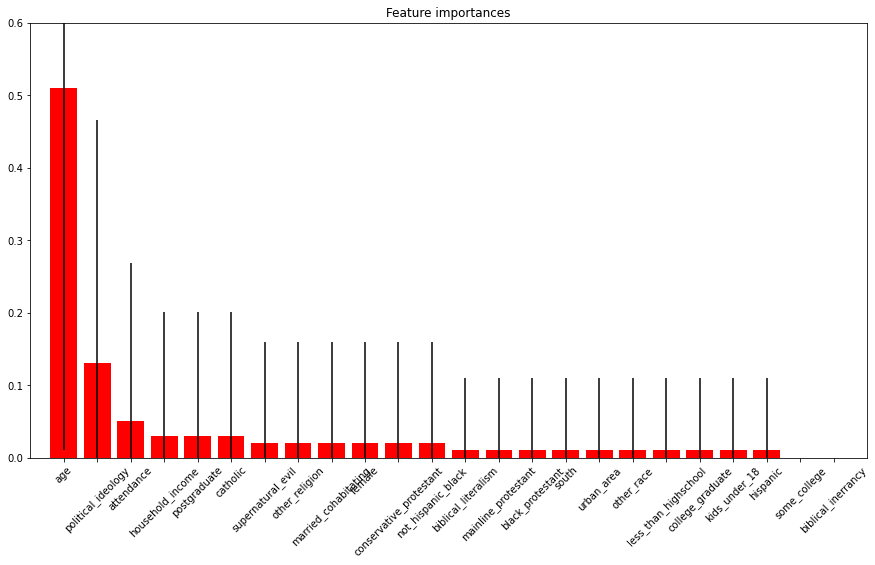

In [79]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), semi_auto_importances[semi_auto_indices],
        tick_label=[feature_cols[x] for x in semi_auto_indices],
        color="r", yerr=semi_auto_std[semi_auto_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.6)
_ = plt.xticks(rotation=45)

---

### Gun Safety Programs

In [80]:

feature_cols = [ col for col in independent.columns]
gun_safety_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score_gun1 = cross_val_score(gun_safety_tree2, 
                           independent.loc[:, feature_cols], 
                           gun_safety_t, cv=10,
                           scoring='accuracy')

cv_score_gun1.mean()

0.8651334354591631

In [81]:
feature_cols = [ col for col in independent.columns]
semi_guns_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score_gun2 = cross_val_score(semi_guns_entropy, 
                           independent.loc[:, feature_cols], 
                           gun_safety_t, cv=10,
                           scoring='accuracy')

cv_score_gun2.mean()

0.8600580504716602

In [82]:

bagging_gun_safety = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_gun_safety_cv_score = cross_val_score(bagging_gun_safety, 
                                  independent.loc[:, feature_cols], 
                                  gun_safety_t, 
                                  cv=10, scoring='accuracy')

bagged_gun_safety_cv_score.mean()

0.9249375151173103

In [83]:

randomforest_gun_safety = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores_gun = cross_val_score(randomforest_gun_safety, independent.loc[:, feature_cols], 
                           gun_safety_t, cv=10,
                           scoring='accuracy')
scores_gun.mean()   

0.9281141659275981

In [84]:
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts_gun = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores_gun4 = cross_val_score(extremely_rts_gun, independent, gun_safety_t, cv=10)
scores_gun4.mean()  

0.926211400467629

In [85]:

gun_safety_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)
scores_gun2 = cross_val_score(gun_safety_adaboost, independent.loc[:, feature_cols], 
                         gun_safety_t, cv=10)
scores_gun2.mean() 

0.9287551398855115

**Conclusion**

As we can observe, the RandomForestClassifier provides us with the highest accuracy score for the gun safety programs variable, although AdaBoostClassifier is extremely close, and thus, we are going to use this for our analysis

In [86]:
randomforest_gun_safety.fit(independent, gun_safety_t)
gun_safety_importances = randomforest_gun_safety.feature_importances_

gun_safety_std = np.std([tree.feature_importances_ for tree in randomforest_gun_safety.estimators_],
             axis=0)
gun_safety_indices = np.argsort(gun_safety_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, gun_safety_indices[f], feature_cols[gun_safety_indices[f]], gun_safety_importances[gun_safety_indices[f]]))

1. feature 18 age (0.187890)
2. feature 9 political_ideology (0.102662)
3. feature 1 attendance (0.100959)
4. feature 19 household_income (0.100049)
5. feature 0 supernatural_evil (0.053555)
6. feature 22 urban_area (0.035889)
7. feature 13 female (0.035604)
8. feature 23 south (0.035494)
9. feature 20 married_cohabitating (0.031554)
10. feature 2 biblical_inerrancy (0.030481)
11. feature 15 some_college (0.030276)
12. feature 16 college_graduate (0.029469)
13. feature 21 kids_under_18 (0.027419)
14. feature 6 conservative_protestant (0.024897)
15. feature 7 catholic (0.024060)
16. feature 3 biblical_literalism (0.023486)
17. feature 4 mainline_protestant (0.020891)
18. feature 17 postgraduate (0.020064)
19. feature 11 hispanic (0.019451)
20. feature 14 less_than_highschool (0.019436)
21. feature 12 other_race (0.013160)
22. feature 10 not_hispanic_black (0.011717)
23. feature 8 other_religion (0.011703)
24. feature 5 black_protestant (0.009834)


**Results**

Here we can see that supernatural evil is indeed among the strong predictors of the support for gun safety programs. However, it seems that there are even stronger and noteworthy predictors such as age, political ideology,household_income, attendance.

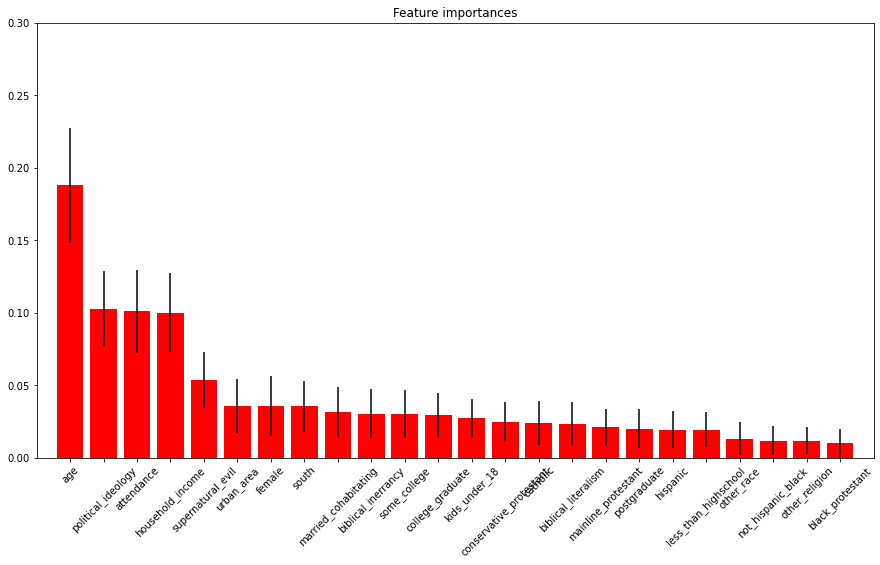

In [87]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), gun_safety_importances[gun_safety_indices],
        tick_label=[feature_cols[x] for x in gun_safety_indices],
        color="r", yerr=gun_safety_std[gun_safety_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.3)
_ = plt.xticks(rotation=45)

---

### Armed Security Schools

In [88]:
feature_cols = [ col for col in independent.columns]
armed_sec_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score_sec1 = cross_val_score(armed_sec_tree2, 
                           independent.loc[:, feature_cols], 
                           armed_security_t, cv=10,
                           scoring='accuracy')

cv_score_sec1.mean()

0.5820527291784245

In [89]:
feature_cols = [ col for col in independent.columns]
armed_sec_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score_sec2 = cross_val_score(semi_guns_entropy, 
                           independent.loc[:, feature_cols], 
                           armed_security_t, cv=10,
                           scoring='accuracy')

cv_score_sec2.mean()

0.5903410465210029

In [90]:
bagging_armed_sec = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_armed_sec_cv_score = cross_val_score(bagging_armed_sec, 
                                  independent.loc[:, feature_cols], 
                                  armed_security_t, 
                                  cv=10, scoring='accuracy')

bagged_armed_sec_cv_score.mean()

0.6736757236152543

In [91]:

randomforest_armed_sec = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores_sec3 = cross_val_score(randomforest_armed_sec, independent.loc[:, feature_cols], 
                           armed_security_t, cv=10,
                           scoring='accuracy')
scores_sec3.mean()  

0.6723615254373941

In [92]:
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts_armed_sec = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores_gun4 = cross_val_score(extremely_rts_armed_sec, independent, armed_security_t, cv=10)
scores_gun4.mean()  

0.6494557768281868

In [93]:
armed_security_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)
scores_sec4 = cross_val_score(armed_security_adaboost, independent.loc[:, feature_cols], 
                         armed_security_t, cv=10)
scores_sec4.mean() 

0.6736837861807627

**Conclusion**

As we can observe, the AdaBoostClassifier  provides us with the highest accuracy score for the armed security in schools variable, although RandomForestClassifier is extremely close, and thus, we are going to use this for our analysis

In [94]:
armed_security_adaboost.fit(independent, armed_security_t)
armed_security_importances = armed_security_adaboost.feature_importances_

armed_security_std = np.std([tree.feature_importances_ for tree in armed_security_adaboost.estimators_],
             axis=0)
armed_security_indices = np.argsort(armed_security_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, armed_security_indices[f], feature_cols[armed_security_indices[f]], armed_security_importances[armed_security_indices[f]]))

1. feature 18 age (0.530000)
2. feature 9 political_ideology (0.070000)
3. feature 19 household_income (0.070000)
4. feature 0 supernatural_evil (0.060000)
5. feature 1 attendance (0.040000)
6. feature 17 postgraduate (0.030000)
7. feature 15 some_college (0.030000)
8. feature 20 married_cohabitating (0.020000)
9. feature 16 college_graduate (0.020000)
10. feature 4 mainline_protestant (0.020000)
11. feature 10 not_hispanic_black (0.020000)
12. feature 3 biblical_literalism (0.010000)
13. feature 7 catholic (0.010000)
14. feature 8 other_religion (0.010000)
15. feature 23 south (0.010000)
16. feature 22 urban_area (0.010000)
17. feature 12 other_race (0.010000)
18. feature 14 less_than_highschool (0.010000)
19. feature 21 kids_under_18 (0.010000)
20. feature 11 hispanic (0.010000)
21. feature 6 conservative_protestant (0.000000)
22. feature 5 black_protestant (0.000000)
23. feature 13 female (0.000000)
24. feature 2 biblical_inerrancy (0.000000)


**Results**

Here we can see that supernatural evil is indeed among the strong predictors of the support for armed security in schools. However, it seems that there are even stronger and noteworthy predictors such as age, political ideology, attendance, household_income.

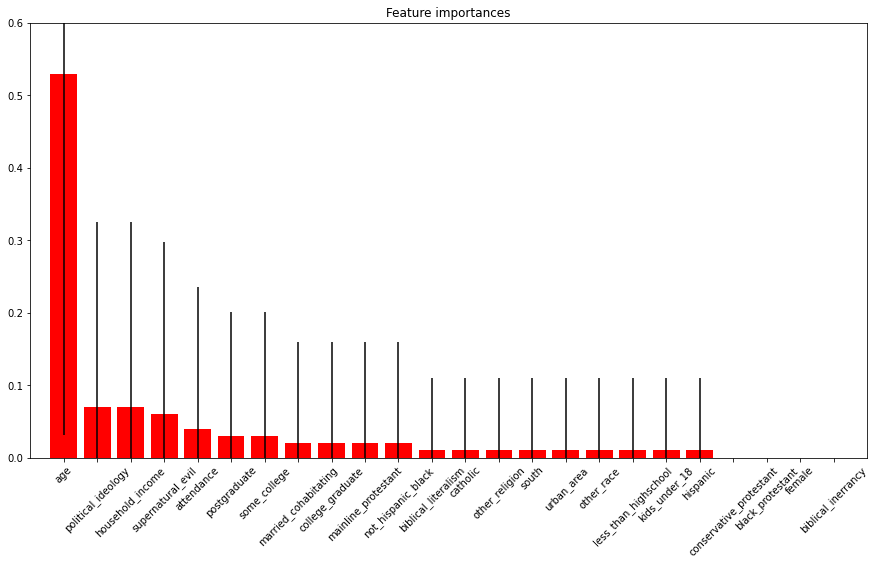

In [95]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), armed_security_importances[armed_security_indices],
        tick_label=[feature_cols[x] for x in armed_security_indices],
        color="r", yerr=armed_security_std[armed_security_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.6)
_ = plt.xticks(rotation=45)

---

### Mental Health Screening

In [96]:
feature_cols = [ col for col in independent.columns]
mental_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score_ment1 = cross_val_score(mental_tree2, 
                           independent.loc[:, feature_cols], 
                           mental_screening_t, cv=10,
                           scoring='accuracy')

cv_score_ment1.mean()

0.8333306458114972

In [97]:
feature_cols = [ col for col in independent.columns]
mental_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score_ment2 = cross_val_score(mental_entropy, 
                           independent.loc[:, feature_cols], 
                           mental_screening_t, cv=10,
                           scoring='accuracy')

cv_score_ment2.mean()

0.8320527291784247

In [98]:
bagging_mental_sec = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_mental_cv_score = cross_val_score(bagging_mental_sec, 
                                  independent.loc[:, feature_cols], 
                                  mental_screening_t, 
                                  cv=10, scoring='accuracy')

bagged_mental_cv_score.mean()

0.9058453599935499

In [99]:
randomforest_mental = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores_ment3 = cross_val_score(randomforest_mental, independent.loc[:, feature_cols], 
                           mental_screening_t, cv=10,
                           scoring='accuracy')
scores_ment3.mean()  

0.9115738127872289

In [100]:
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts_mental = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores_ment4 = cross_val_score(extremely_rts_mental, independent, mental_screening_t, cv=10)
scores_ment4.mean()  

0.9007699750060469

In [101]:
mental_screening_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)

mental_screening_scores = cross_val_score(mental_screening_adaboost, independent.loc[:, feature_cols], 
                         mental_screening_t, cv=5)
print(mental_screening_scores.mean())

0.9103124052168639


**Conclusion**

As we can observe, the AdaBoostClassifier provides us with the highest accuracy score for the mental health screening, although RandomForestClassifier is extremely close, and thus, we are going to use this for our analysis

In [102]:
mental_screening_adaboost.fit(independent, mental_screening_t)
mental_screening_importances = mental_screening_adaboost.feature_importances_

mental_screening_std = np.std([tree.feature_importances_ for tree in mental_screening_adaboost.estimators_],
             axis=0)
mental_screening_indices = np.argsort(mental_screening_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, mental_screening_indices[f], feature_cols[mental_screening_indices[f]], mental_screening_importances[mental_screening_indices[f]]))

1. feature 18 age (0.680000)
2. feature 9 political_ideology (0.080000)
3. feature 11 hispanic (0.030000)
4. feature 1 attendance (0.020000)
5. feature 19 household_income (0.020000)
6. feature 17 postgraduate (0.020000)
7. feature 13 female (0.020000)
8. feature 12 other_race (0.020000)
9. feature 10 not_hispanic_black (0.010000)
10. feature 4 mainline_protestant (0.010000)
11. feature 7 catholic (0.010000)
12. feature 8 other_religion (0.010000)
13. feature 23 south (0.010000)
14. feature 22 urban_area (0.010000)
15. feature 14 less_than_highschool (0.010000)
16. feature 15 some_college (0.010000)
17. feature 16 college_graduate (0.010000)
18. feature 20 married_cohabitating (0.010000)
19. feature 0 supernatural_evil (0.010000)
20. feature 6 conservative_protestant (0.000000)
21. feature 5 black_protestant (0.000000)
22. feature 3 biblical_literalism (0.000000)
23. feature 2 biblical_inerrancy (0.000000)
24. feature 21 kids_under_18 (0.000000)


**Results**

Here we can see that supernatural evil is not among the strong predictors of the support for the mental health screening. In logistic regression we had a similar result where a unit of increment in supernatural evil cased a 16% decrease in the odds of supporting mental health screening.
For mental health screening, stronger predictors are the age, political_ideology, hispanic, attendance, household_income, postgraduate.

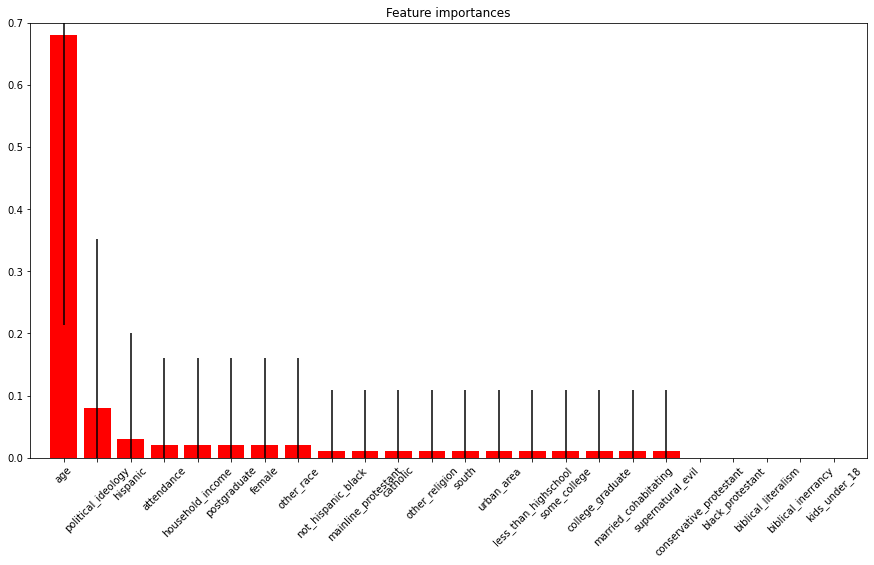

In [103]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), mental_screening_importances[mental_screening_indices],
        tick_label=[feature_cols[x] for x in mental_screening_indices],
        color="r", yerr=mental_screening_std[mental_screening_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.7)
_ = plt.xticks(rotation=45)

---

### High Capacity Ammo Clips Ban

In [104]:
feature_cols = [ col for col in independent.columns]
ammoclips_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score_ammo1 = cross_val_score(ammoclips_tree2, 
                           independent.loc[:, feature_cols], 
                           ammoclips_t, cv=10,
                           scoring='accuracy')

cv_score_ammo1.mean()

0.65650245908248

In [105]:
feature_cols = [ col for col in independent.columns]
ammo_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score_ammo2 = cross_val_score(ammo_entropy, 
                           independent.loc[:, feature_cols], 
                           ammoclips_t, cv=10,
                           scoring='accuracy')

cv_score_ammo2.mean()

0.6577803757155526

In [106]:
bagging_ammo = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_ammo_cv_score = cross_val_score(bagging_ammo, 
                                  independent.loc[:, feature_cols], 
                                  ammoclips_t, 
                                  cv=10, scoring='accuracy')

bagged_ammo_cv_score.mean()

0.7131258566475852

In [107]:
randomforest_ammo = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores_ammo3 = cross_val_score(randomforest_ammo, independent.loc[:, feature_cols], 
                           ammoclips_t, cv=10,
                           scoring='accuracy')
scores_ammo3.mean()  

0.7398371361767314

In [108]:
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts_ammo = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores_ammo4 = cross_val_score(extremely_rts_ammo, independent, ammoclips_t, cv=10)
scores_ammo4.mean() 

0.7137587680399904

In [109]:
ammo_clips_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)

ammo_clips_scores = cross_val_score(ammo_clips_adaboost, independent.loc[:, feature_cols], 
                         ammoclips_t, cv=10)
ammo_clips_scores.mean()

0.729001048133516

**Conclusion**

As we can observe, the RandomForestClassifier provides us with the highest accuracy score for the high capacity ammo clips ban variable, and thus, we are going to use this for our analysis


In [110]:
randomforest_ammo.fit(independent, ammoclips_t)
ammo_clips_importances = randomforest_ammo.feature_importances_

ammo_clips_std = np.std([tree.feature_importances_ for tree in randomforest_ammo.estimators_],
             axis=0)
ammo_clips_indices = np.argsort(ammo_clips_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, ammo_clips_indices[f], feature_cols[ammo_clips_indices[f]], ammo_clips_importances[ammo_clips_indices[f]]))

1. feature 18 age (0.190039)
2. feature 9 political_ideology (0.130540)
3. feature 1 attendance (0.093246)
4. feature 19 household_income (0.092272)
5. feature 13 female (0.061144)
6. feature 0 supernatural_evil (0.052287)
7. feature 23 south (0.033756)
8. feature 22 urban_area (0.032986)
9. feature 20 married_cohabitating (0.031985)
10. feature 21 kids_under_18 (0.026193)
11. feature 2 biblical_inerrancy (0.025726)
12. feature 15 some_college (0.025349)
13. feature 16 college_graduate (0.024567)
14. feature 7 catholic (0.021537)
15. feature 3 biblical_literalism (0.021043)
16. feature 6 conservative_protestant (0.021027)
17. feature 17 postgraduate (0.020484)
18. feature 11 hispanic (0.019438)
19. feature 4 mainline_protestant (0.018685)
20. feature 8 other_religion (0.014175)
21. feature 10 not_hispanic_black (0.012742)
22. feature 14 less_than_highschool (0.012536)
23. feature 12 other_race (0.009263)
24. feature 5 black_protestant (0.008981)


**Results**

Here we can see that supernatural evil is indeed among the strong predictors of the support for high capacity ammo clips ban. However, it seems that there are even stronger and noteworthy predictors such as age, political ideology, attendance, household_income, female.

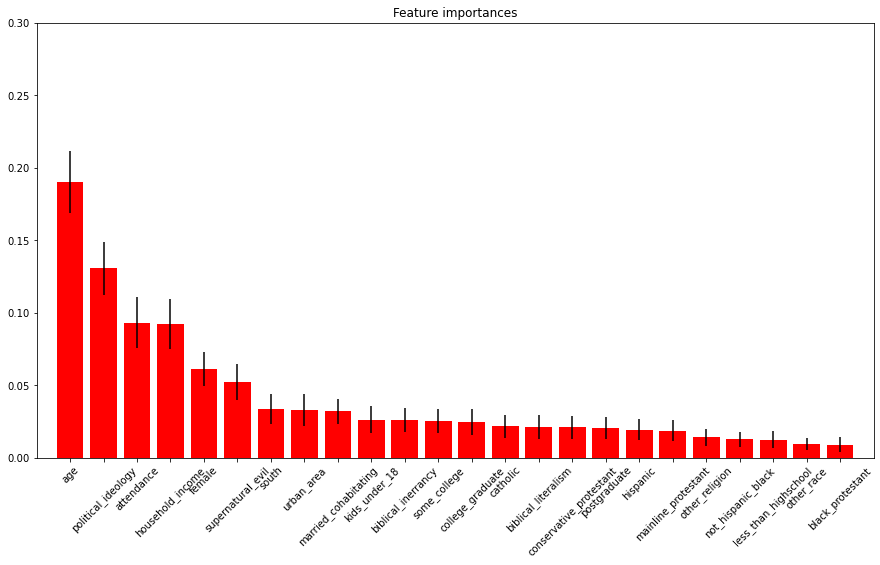

In [111]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), ammo_clips_importances[ammo_clips_indices],
        tick_label=[feature_cols[x] for x in ammo_clips_indices],
        color="r", yerr=ammo_clips_std[ammo_clips_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.3)
_ = plt.xticks(rotation=45)

---

### Teachers with Guns

In [112]:
feature_cols = [ col for col in independent.columns]
teachers_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score_teach1 = cross_val_score(teachers_tree2, 
                           independent.loc[:, feature_cols], 
                           teachers_guns_t, cv=10,
                           scoring='accuracy')

cv_score_teach1.mean()

0.6468999435620415

In [113]:
feature_cols = [ col for col in independent.columns]
teach_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score_teach2 = cross_val_score(teach_entropy, 
                           independent.loc[:, feature_cols], 
                           teachers_guns_t, cv=10,
                           scoring='accuracy')

cv_score_teach2.mean()

0.6456099330807062

In [114]:
bagging_teach = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_teach_cv_score = cross_val_score(bagging_teach, 
                                  independent.loc[:, feature_cols], 
                                  teachers_guns_t, 
                                  cv=10, scoring='accuracy')

bagged_teach_cv_score.mean()

0.714359429170362

In [115]:
randomforest_teach = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores_teach3 = cross_val_score(randomforest_teach, independent.loc[:, feature_cols], 
                           teachers_guns_t, cv=10,
                           scoring='accuracy')
scores_teach3.mean()  

0.7232967830363621

In [116]:
from sklearn.ensemble import ExtraTreesClassifier

extremely_rts_teach = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores_teach4 = cross_val_score(extremely_rts_teach, independent, teachers_guns_t, cv=10)
scores_teach4.mean() 

0.7105498669676691

In [117]:
teach_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)

teach_scores = cross_val_score(teach_adaboost, independent.loc[:, feature_cols], 
                         teachers_guns_t, cv=5)
teach_scores.mean()

0.726462440602568

**Conclusion**

As we can observe, the AdaBoostClassifier provides us with the highest accuracy score for the teachers with guns variable, although the RandomForestClassifier is extremely close, and thus, we are going to use this for our analysis


In [118]:

teach_adaboost.fit(independent, teachers_guns_t)
teachers_guns_importances = teach_adaboost.feature_importances_

teachers_guns_std = np.std([tree.feature_importances_ for tree in teach_adaboost.estimators_],
             axis=0)
teachers_guns_indices = np.argsort(teachers_guns_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, teachers_guns_indices[f], feature_cols[teachers_guns_indices[f]], teachers_guns_importances[teachers_guns_indices[f]]))

1. feature 18 age (0.540000)
2. feature 9 political_ideology (0.140000)
3. feature 19 household_income (0.080000)
4. feature 1 attendance (0.040000)
5. feature 0 supernatural_evil (0.020000)
6. feature 13 female (0.020000)
7. feature 12 other_race (0.020000)
8. feature 22 urban_area (0.020000)
9. feature 3 biblical_literalism (0.010000)
10. feature 4 mainline_protestant (0.010000)
11. feature 6 conservative_protestant (0.010000)
12. feature 7 catholic (0.010000)
13. feature 8 other_religion (0.010000)
14. feature 23 south (0.010000)
15. feature 10 not_hispanic_black (0.010000)
16. feature 16 college_graduate (0.010000)
17. feature 17 postgraduate (0.010000)
18. feature 20 married_cohabitating (0.010000)
19. feature 21 kids_under_18 (0.010000)
20. feature 11 hispanic (0.010000)
21. feature 14 less_than_highschool (0.000000)
22. feature 15 some_college (0.000000)
23. feature 5 black_protestant (0.000000)
24. feature 2 biblical_inerrancy (0.000000)


**Results**

Here we can see that supernatural evil is indeed among the strong predictors of the support for teachers with guns in schools. However, it seems that there are even stronger and noteworthy predictors such as age, political ideology, household_income, attendance.

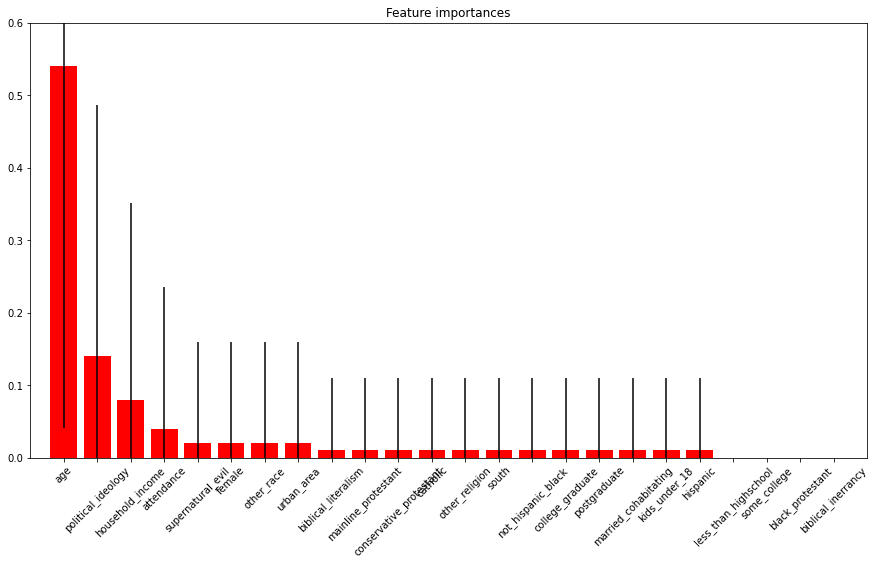

In [119]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), teachers_guns_importances[teachers_guns_indices],
        tick_label=[feature_cols[x] for x in teachers_guns_indices],
        color="r", yerr=teachers_guns_std[teachers_guns_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.6)
_ = plt.xticks(rotation=45)

---

### Hand Guns Possesion Ban

In [120]:
feature_cols = [ col for col in independent.columns]
handguns_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score_handguns1 = cross_val_score(handguns_tree2, 
                           independent.loc[:, feature_cols], 
                           handguns_t, cv=10,
                           scoring='accuracy')

cv_score_handguns1.mean()

0.6507215996129969

In [121]:
feature_cols = [ col for col in independent.columns]
handguns_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score_handguns2 = cross_val_score(handguns_entropy, 
                           independent.loc[:, feature_cols], 
                           handguns_t, cv=10,
                           scoring='accuracy')

cv_score_handguns2.mean()

0.6437232927517536

In [122]:
bagging_handguns = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_hand_cv_score = cross_val_score(bagging_handguns, 
                                  independent.loc[:, feature_cols], 
                                  handguns_t, 
                                  cv=10, scoring='accuracy')

bagged_hand_cv_score.mean()

0.7213456421833426

In [123]:
randomforest_handguns = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores_handguns3 = cross_val_score(randomforest_handguns, independent.loc[:, feature_cols], 
                           handguns_t, cv=10,
                           scoring='accuracy')
scores_handguns3.mean()  

0.7149842779972587

In [124]:

extremely_rts_handguns = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores_handguns4 = cross_val_score(extremely_rts_handguns, independent, handguns_t, cv=10)
scores_handguns4.mean() 

0.7086229138111746

In [125]:
handguns_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)

hand_scores = cross_val_score(handguns_adaboost, independent.loc[:, feature_cols], 
                         handguns_t, cv=5)
hand_scores.mean()

0.7201031240521687

**Conclusion**

As we can observe, the AdaBoostClassifier provides us with the highest accuracy score for the civilian handguns ban variable, and thus, we are going to use this for our analysis

In [126]:
handguns_adaboost.fit(independent, handguns_t)
handguns_importances = handguns_adaboost.feature_importances_

handguns_std = np.std([tree.feature_importances_ for tree in handguns_adaboost.estimators_],
             axis=0)
handguns_indices = np.argsort(handguns_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, handguns_indices[f], feature_cols[handguns_indices[f]], handguns_importances[handguns_indices[f]]))

1. feature 18 age (0.500000)
2. feature 1 attendance (0.150000)
3. feature 19 household_income (0.070000)
4. feature 0 supernatural_evil (0.050000)
5. feature 9 political_ideology (0.050000)
6. feature 10 not_hispanic_black (0.020000)
7. feature 5 black_protestant (0.020000)
8. feature 7 catholic (0.020000)
9. feature 11 hispanic (0.020000)
10. feature 14 less_than_highschool (0.010000)
11. feature 13 female (0.010000)
12. feature 12 other_race (0.010000)
13. feature 22 urban_area (0.010000)
14. feature 15 some_college (0.010000)
15. feature 16 college_graduate (0.010000)
16. feature 8 other_religion (0.010000)
17. feature 3 biblical_literalism (0.010000)
18. feature 21 kids_under_18 (0.010000)
19. feature 23 south (0.010000)
20. feature 17 postgraduate (0.000000)
21. feature 6 conservative_protestant (0.000000)
22. feature 20 married_cohabitating (0.000000)
23. feature 4 mainline_protestant (0.000000)
24. feature 2 biblical_inerrancy (0.000000)


**Results**

Here we can see that supernatural evil is indeed among the strong predictors of the support for the civilian handguns ban. However, it seems that there are even stronger and noteworthy predictors such as age, attendance, household_income.

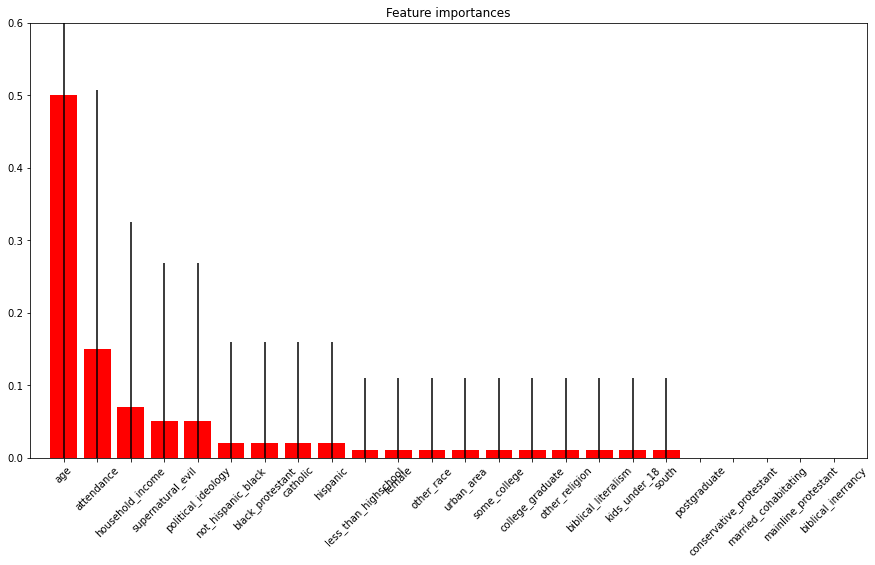

In [127]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), handguns_importances[handguns_indices],
        tick_label=[feature_cols[x] for x in handguns_indices],
        color="r", yerr=handguns_std[handguns_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.6)
_ = plt.xticks(rotation=45)

---

### Concealed Carry

In [128]:
feature_cols = [ col for col in independent.columns]
concealed_tree2 = DecisionTreeClassifier(random_state=0, criterion='gini')
cv_score_concealed1 = cross_val_score(concealed_tree2, 
                           independent.loc[:, feature_cols], 
                           concealed_carry_t, cv=10,
                           scoring='accuracy')

cv_score_concealed1.mean()

0.5909779891961622

In [129]:
feature_cols = [ col for col in independent.columns]
concealed_entropy = DecisionTreeClassifier(random_state=0, criterion='entropy')
cv_score_concealed2 = cross_val_score(concealed_entropy, 
                           independent.loc[:, feature_cols], 
                           concealed_carry_t, cv=10,
                           scoring='accuracy')

cv_score_concealed2.mean()

0.5884019995162462

In [130]:
bagging_concealed = BaggingClassifier(DecisionTreeClassifier(criterion='entropy'),
                                       n_estimators=50, 
                                       n_jobs=-1)
bagged_concealed_cv_score = cross_val_score(bagging_concealed, 
                                  independent.loc[:, feature_cols], 
                                  concealed_carry_t, 
                                  cv=10, scoring='accuracy')

bagged_concealed_cv_score.mean()

0.6367814238490688

In [131]:
randomforest_concealed = RandomForestClassifier(n_estimators=100, max_depth=None,
                                min_samples_split=2)
scores_concealed3 = cross_val_score(randomforest_concealed, independent.loc[:, feature_cols], 
                           concealed_carry_t, cv=10,
                           scoring='accuracy')
scores_concealed3.mean()  

0.6456704023220189

In [132]:
extremely_rts_concealed = ExtraTreesClassifier(n_estimators=50, 
                                     max_depth=None,
                                     min_samples_split=2)

scores_concealed4 = cross_val_score(extremely_rts_concealed, independent, concealed_carry_t, cv=10)
scores_concealed4.mean() 

0.6272151898734177

In [133]:
concealed_carry_adaboost = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),
    n_estimators=100)

concealed_carry_scores = cross_val_score(concealed_carry_adaboost, independent.loc[:, feature_cols], 
                         concealed_carry_t, cv=10)
print(concealed_carry_scores.mean())

0.6622228493106506


**Conclusion**

As we can observe, the AdaBoostClassifier provides us with the highest accuracy score for the concealed carry variable, and thus, we are going to use this for our analysis

In [134]:
concealed_carry_adaboost.fit(independent, concealed_carry_t)
concealed_carry_importances = concealed_carry_adaboost.feature_importances_

concealed_carry_std = np.std([tree.feature_importances_ for tree in concealed_carry_adaboost.estimators_],
             axis=0)
concealed_carry_indices = np.argsort(concealed_carry_importances)[::-1]

for f in range(independent.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, concealed_carry_indices[f], feature_cols[concealed_carry_indices[f]], concealed_carry_importances[concealed_carry_indices[f]]))

1. feature 18 age (0.510000)
2. feature 9 political_ideology (0.080000)
3. feature 19 household_income (0.060000)
4. feature 0 supernatural_evil (0.050000)
5. feature 1 attendance (0.040000)
6. feature 2 biblical_inerrancy (0.030000)
7. feature 17 postgraduate (0.030000)
8. feature 13 female (0.020000)
9. feature 3 biblical_literalism (0.020000)
10. feature 12 other_race (0.020000)
11. feature 11 hispanic (0.020000)
12. feature 20 married_cohabitating (0.020000)
13. feature 14 less_than_highschool (0.010000)
14. feature 22 urban_area (0.010000)
15. feature 15 some_college (0.010000)
16. feature 8 other_religion (0.010000)
17. feature 7 catholic (0.010000)
18. feature 5 black_protestant (0.010000)
19. feature 4 mainline_protestant (0.010000)
20. feature 16 college_graduate (0.010000)
21. feature 21 kids_under_18 (0.010000)
22. feature 23 south (0.010000)
23. feature 10 not_hispanic_black (0.000000)
24. feature 6 conservative_protestant (0.000000)


**Results**

Here we can see that supernatural evil is indeed among the strong predictors of the support for concealed carry. However, it seems that there are even stronger and noteworthy predictors such as age, political ideology, household_income.

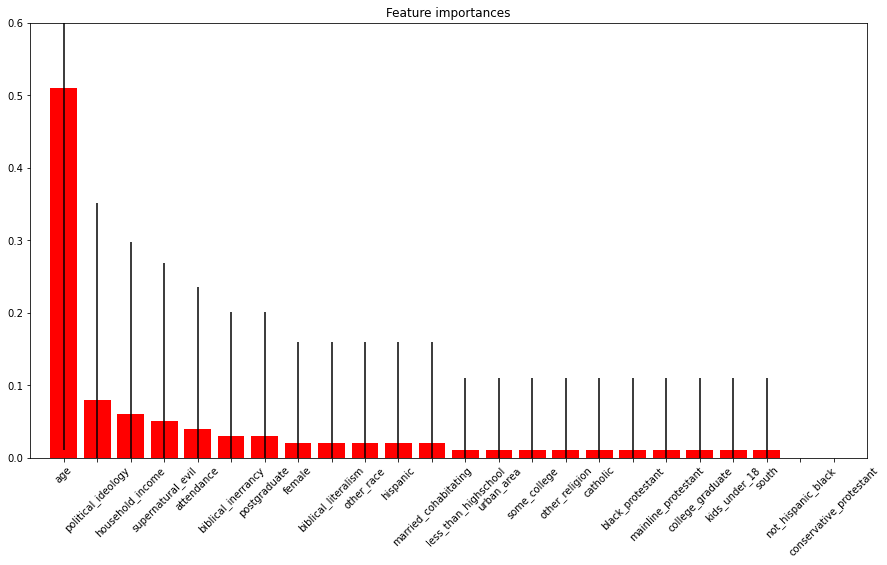

In [135]:
# Plot the feature importances of the forest
plt.figure(figsize=(15, 8))
plt.title("Feature importances")
plt.bar(range(independent.shape[1]), concealed_carry_importances[concealed_carry_indices],
        tick_label=[feature_cols[x] for x in concealed_carry_indices],
        color="r", yerr=concealed_carry_std[concealed_carry_indices], align="center")
plt.xlim([-1, independent.shape[1]])
plt.ylim(0, 0.6)
_ = plt.xticks(rotation=45)

### !!!
**IMPORTANT NOTE** 

I also wanted to try XGBoost and LightGBM which I know provide very good results in terms of accuracy. However, due to the fact that I am working from an M1 Macbook, I encountered a lot of difficulties that I could not surpass. More specifically, although I had downloaded all the important dependencies and different packages that I found that might help, it could not run. No matter the time it was running, it could not return anything. 